# Data Integration for Austin Granular Model for 2018-2019 School Year

In [1]:
import pandas as pd
import geopandas as gpd
import xarray as xr

/Users/kpierce/epimodels/epi-venv/lib/python3.9/site-packages/geopandas/_compat.py:111: UserWarning: The Shapely GEOS version (3.9.1-CAPI-1.14.2) is incompatible with the GEOS version PyGEOS was compiled with (3.10.1-CAPI-1.16.0). Conversions between both will be slow.
  warnings.warn(


## Data categories and sources

### Zip code tabulation area population data by age

See `epimodels/notebooks/AustinGranularModel/ZCTA/TX_ZCTA_age_populations.r` for details on data download.

In [2]:
zcta_age_pop_2018 = pd.read_csv('/Users/kpierce/epimodels/notebooks/AustinGranularModel/ZCTA/2018_TX_ZCTA_age_populations.csv')
zcta_age_pop_2019 = pd.read_csv('/Users/kpierce/epimodels/notebooks/AustinGranularModel/ZCTA/2019_TX_ZCTA_age_populations.csv')

In [3]:
zcta_age_pop_2019['age'].unique()

array(['10 to 14 years', '15 to 17 years', '18 and 19 years', '20 years',
       '21 years', '22 to 24 years', '25 to 29 years', '30 to 34 years',
       '35 to 39 years', '40 to 44 years', '45 to 49 years',
       '5 to 9 years', '50 to 54 years', '55 to 59 years',
       '60 and 61 years', '62 to 64 years', '65 and 66 years',
       '67 to 69 years', '70 to 74 years', '75 to 79 years',
       '80 to 84 years', '85 years and over', 'Under 5 years'],
      dtype=object)

### Zip code tabulation area geometries by year

See `epimodels/notebooks/AustinGranularModel/ZCTA/TX_ZCTA_age_populations.r` for details on data download.

Shapefiles are converted to the [NAD83/Texas Centric Albers Equal Area projection](https://spatialreference.org/ref/epsg/3083/), used for state-wide spatial data presentation requiring true area measurements.

In [4]:
zcta_shp_2018 = gpd.read_file('/Users/kpierce/epimodels/notebooks/AustinGranularModel/ZCTA/2018_TX_zcta.shp')
zcta_shp_2019 = gpd.read_file('/Users/kpierce/epimodels/notebooks/AustinGranularModel/ZCTA/2019_TX_zcta.shp')

In [5]:
from geopandas import testing

In [6]:
#gpd.testing.assert_geodataframe_equal(zcta_shp_2018, zcta_shp_2019, check_less_precise=True, check_like=True)

In [7]:
zcta_shp_2018 = zcta_shp_2018.to_crs('EPSG:3083')
zcta_shp_2019 = zcta_shp_2019.to_crs('EPSG:3083')

### Zip code tabulation area level private school enrollment

See `epimodels/notebooks/AustinGranularModel/Schools/AISD_enrollment_by_zcta.r` for details on data download.

In [8]:
zcta_enroll = pd.read_csv('/Users/kpierce/epimodels/notebooks/AustinGranularModel/Schools/data/2018_2019_AISD_Select_Private_School_Enrollment_Estimates_by_ZCTA.csv')


### AISD school attendance boundaries

- 2020-21 downloaded from AISD website
- Open records request data provides the following information on attendance areas: 
    - No change from 2015 till 2019
    - 2019-2020 Elementary changed 

In [9]:
aisd_201819_elem = gpd.read_file('/Users/kpierce/epimodels/notebooks/AustinGranularModel/Schools/data/ORR - Kelly Pierce/2015-16 Boundaries/1516_Boundaries_Schools/1516_Elementary_Boundaries.shp')
aisd_201819_midd = gpd.read_file('/Users/kpierce/epimodels/notebooks/AustinGranularModel/Schools/data/ORR - Kelly Pierce/2015-16 Boundaries/1516_Boundaries_Schools/Middle_AA.shp')
aisd_201819_high = gpd.read_file('/Users/kpierce/epimodels/notebooks/AustinGranularModel/Schools/data/ORR - Kelly Pierce/2015-16 Boundaries/1516_Boundaries_Schools/1516_High_Boundaries.shp')
                
aisd_201819_elem = aisd_201819_elem.to_crs('EPSG:3083')
aisd_201819_midd = aisd_201819_midd.to_crs('EPSG:3083')
aisd_201819_high = aisd_201819_high.to_crs('EPSG:3083')

### AISD school calendars

See [Current and Previous AISD Calendars](https://www.austinisd.org/advisory-bodies/calendar-planning) for calendar PDFs. Weekdays with holidays were manually entered into the spreadsheet at `epimodels/notebooks/AustinGranularModel/Schools/data/AISDCalendars/AISD_2018_2021_Calendar.csv`

The remaining dates (weekends and non-holiday weekdays) were added in notebook `epimodels/notebooks/AustinGranularModel/Schools/AISDSchoolCalendar.ipynb` and saved in the CSV loaded below.

In [10]:
full_calendar = pd.read_csv(
    '/Users/kpierce/epimodels/notebooks/AustinGranularModel/Schools/data/AISDCalendars/AISD_2018_2021_Calendar_all_dates.csv',
    parse_dates=['date']
)


### Baseline contact rates

Citations:

Mossong J, Hens N, Jit M, Beutels P, Auranen K, Mikolajczyk R, et al. (2008) Social Contacts and Mixing Patterns Relevant to the Spread of Infectious Diseases. PLoS Med 5(3): e74. https://doi.org/10.1371/journal.pmed.0050074

Prem K, Cook AR, Jit M (2017) Projecting social contact matrices in 152 countries using contact surveys and demographic data. PLoS Comput Biol 13(9): e1005697. https://doi.org/10.1371/journal.pcbi.1005697

Workflow in `/epimodels/notebooks/AustinGranularModel/BaselineContacts/BaselineContactRates.ipynb`

In [11]:
contacts_da = xr.open_dataarray(
    '/Users/kpierce/epimodels/notebooks/AustinGranularModel/BaselineContacts/usa_baseline_contacts_seven_age_groups_avg2018_2019.nc/',
    engine='netcdf4'
)

In [12]:
contacts_da

<xarray.DataArray 'daily_per_capita_contacts' (age0: 7, age1: 7)>
array([[2.598237, 0.647264, 0.304842, 0.239263, 0.441296, 0.430486, 0.197289],
       [0.800341, 4.195983, 5.086729, 3.418347, 0.806704, 0.663987, 0.356512],
       [0.499396, 4.754312, 8.284524, 5.676042, 0.997974, 0.711854, 0.366765],
       [0.407697, 2.707287, 4.629002, 5.857926, 1.837333, 0.845283, 0.336584],
       [0.615639, 0.63202 , 0.663199, 1.556845, 1.656949, 0.988708, 0.333401],
       [0.258852, 0.199995, 0.196767, 0.242672, 0.488382, 0.98129 , 0.347691],
       [0.082899, 0.07101 , 0.071521, 0.056171, 0.059041, 0.143498, 0.386805]])
Coordinates:
  * age0     (age0) object '00-04' '05-10' '11-13' '14-17' '18-49' '50-64' '65+'
  * age1     (age1) object '00-04' '05-10' '11-13' '14-17' '18-49' '50-64' '65+'

In [13]:
type(contacts_da)

xarray.core.dataarray.DataArray

### Mobility patterns

From Safegraph/Kelly Gaither

## Core assumptions

1. Population is uniform over ZCTAs and school attendance boundaries (no accounting is made for commercial/non-residential areas).
2. The same percentage of children in each ZCTA are enrolled in private school across all age groups (the percent of elementary school aged students enrolled in private elementary schools is the same as the percent of middle school aged students enrolled in middle schools, etc.).
3. Safegraph travel for people 13 and older is reflective of travel patterns across all ages.
4. School attendance transfers have a negligible impact on travel and contact and can be disregarded.

## Integration workflow

### 1. Calculate percentage of the population in each age group comprised of a given age

Use the US Census Bureau National Characteristics table with population by age to disaggregate the age groups for smaller areas where such detailed information cannot be published. The disaggregated data can then be regrouped as needed.

Regroup the census age categories into the target age categories using US-level population weights to break down the population.

In [14]:
us_pop_total = pd.read_excel(
    '/Users/kpierce/epimodels/notebooks/AustinGranularModel/BaselineContacts/nc-est2019-syasexn.xlsx',
    skiprows=[0, 1, 2], nrows=1
)
us_pop_total = us_pop_total.rename(columns={'Unnamed: 0': 'age'})
us_total_pop_2018 = us_pop_total[2018].values.item()
us_pop_age = pd.read_excel(
    '/Users/kpierce/epimodels/notebooks/AustinGranularModel/BaselineContacts/nc-est2019-syasexn.xlsx',
    skiprows=[0, 1, 2, 4], nrows=101
)
us_pop_age = us_pop_age.rename(columns={'Unnamed: 0': 'age'})
us_pop_age['age'] = [i.split('.')[1] for i in us_pop_age['age']]
us_pop_age['age'] = [i.split('+')[0] for i in us_pop_age['age']]
us_pop_age['age'] = us_pop_age['age'].astype(int)

The following works only because the dataframe is sorted in ascending order:

In [15]:
census_age_groups = []
for i in us_pop_age['age']:
    if i < 5:
        census_age_groups.append('00-04')
    elif i < 10:
        census_age_groups.append('05-09')
    elif i < 15:
        census_age_groups.append('10-14')
    elif i < 18:
        census_age_groups.append('15-17')
    elif i < 20:
        census_age_groups.append('18-19')
    elif i < 21:
        census_age_groups.append('20')
    elif i < 22:
        census_age_groups.append('21')
    elif i < 25:
        census_age_groups.append('22-24')
    elif i < 30:
        census_age_groups.append('25-29')
    elif i < 35:
        census_age_groups.append('30-34')
    elif i < 40:
        census_age_groups.append('35-39')
    elif i < 45:
        census_age_groups.append('40-44')
    elif i < 50:
        census_age_groups.append('45-49')
    elif i < 55:
        census_age_groups.append('50-54')
    elif i < 60:
        census_age_groups.append('55-59')
    elif i < 62:
        census_age_groups.append('60-61')
    elif i < 65:
        census_age_groups.append('62-64')
    elif i < 67:
        census_age_groups.append('65-66')
    elif i < 70:
        census_age_groups.append('67-69')
    elif i < 75:
        census_age_groups.append('70-74')
    elif i < 80:
        census_age_groups.append('75-79')
    elif i < 85:
        census_age_groups.append('80-84')
    else:
        census_age_groups.append('85+')

us_pop_age['census_age_group'] = census_age_groups

In [16]:
revised_age_groups = []
for i in us_pop_age['age']:
    if i < 5:
        revised_age_groups.append('00-04')
    elif i < 11:
        revised_age_groups.append('05-10')
    elif i < 14:
        revised_age_groups.append('11-13')
    elif i < 18:
        revised_age_groups.append('14-17')
    elif i < 50:
        revised_age_groups.append('18-49')
    elif i < 65:
        revised_age_groups.append('50-64')
    else:
        revised_age_groups.append('65+')

us_pop_age['revised_age_group'] = revised_age_groups

In [17]:
us_pop_age.tail()

,age,Census,Estimates Base,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,census_age_group,revised_age_group
96,96,95223,95288,97259,101295,105060,108285,120427,122315,136011,147449,151823,157463,85+,65+
97,97,68138,68168,68966,73267,76840,79369,82948,92078,94732,104068,113716,116969,85+,65+
98,98,45900,45938,47086,50654,54192,56508,59546,61585,69464,71571,77943,86150,85+,65+
99,99,32266,32289,32214,33604,36514,38797,41277,43276,45030,50969,53184,57124,85+,65+
100,100,53364,53412,54437,57513,61035,64898,70685,75449,81199,85663,93038,100322,85+,65+


In [18]:
us_pop_long = pd.melt(
    us_pop_age.drop(['Census', 'Estimates Base'], axis=1), 
    id_vars=['age', 'census_age_group', 'revised_age_group'], 
    var_name='year', 
    value_name='population'
)

In [19]:
us_pop_long.head()

,age,census_age_group,revised_age_group,year,population
0,0,00-04,00-04,2010,3951430
1,1,00-04,00-04,2010,3957730
2,2,00-04,00-04,2010,4090621
3,3,00-04,00-04,2010,4111688
4,4,00-04,00-04,2010,4077346


Calculate annual totals by age group and reshape to long form.

In [20]:
us_pop_age_grouped_census = us_pop_long.groupby(['census_age_group', 'year'])['population'].sum().reset_index()
us_pop_age_grouped_census = pd.merge(
    us_pop_age_grouped_census,
    us_pop_long[['census_age_group', 'age']].drop_duplicates(),
    on='census_age_group',
    how='left'
)
us_pop_age_grouped_census = us_pop_age_grouped_census.rename(columns={'population': 'census_age_group_total'})

In [21]:
us_pop_age_grouped_census

,census_age_group,year,census_age_group_total,age
0,00-04,2010,20188815,0
1,00-04,2010,20188815,1
2,00-04,2010,20188815,2
3,00-04,2010,20188815,3
4,00-04,2010,20188815,4
...,...,...,...,...
1005,85+,2019,6604958,96
1006,85+,2019,6604958,97
1007,85+,2019,6604958,98
1008,85+,2019,6604958,99


In [22]:
us_pop_age_grouped_revised = us_pop_long.groupby(['revised_age_group', 'year'])['population'].sum().reset_index()
us_pop_age_grouped_revised = pd.merge(
    us_pop_age_grouped_revised,
    us_pop_long[['revised_age_group', 'age']].drop_duplicates(),
    on='revised_age_group',
    how='left'
)
us_pop_age_grouped_revised = us_pop_age_grouped_revised.rename(columns={'population': 'revised_age_group_total'})

In [23]:
us_pop_age_grouped_revised

,revised_age_group,year,revised_age_group_total,age
0,00-04,2010,20188815,0
1,00-04,2010,20188815,1
2,00-04,2010,20188815,2
3,00-04,2010,20188815,3
4,00-04,2010,20188815,4
...,...,...,...,...
1005,65+,2019,54058263,96
1006,65+,2019,54058263,97
1007,65+,2019,54058263,98
1008,65+,2019,54058263,99


In [24]:
us_pop_age_group_totals = pd.merge(
    us_pop_age_grouped_census,
    us_pop_age_grouped_revised,
    on=['year', 'age'],
    how='outer'
)

In [25]:
us_pop_age_group_totals.tail()

,census_age_group,year,census_age_group_total,age,revised_age_group,revised_age_group_total
1005,85+,2019,6604958,96,65+,54058263
1006,85+,2019,6604958,97,65+,54058263
1007,85+,2019,6604958,98,65+,54058263
1008,85+,2019,6604958,99,65+,54058263
1009,85+,2019,6604958,100,65+,54058263


In [26]:
us_pop_long_group_totals = pd.merge(
    us_pop_long,
    us_pop_age_group_totals,
    on=['age', 'year', 'revised_age_group', 'census_age_group'],
    how='left'
)

In [27]:
us_pop_long_group_totals.tail()

,age,census_age_group,revised_age_group,year,population,census_age_group_total,revised_age_group_total
1005,96,85+,65+,2019,157463,6604958,54058263
1006,97,85+,65+,2019,116969,6604958,54058263
1007,98,85+,65+,2019,86150,6604958,54058263
1008,99,85+,65+,2019,57124,6604958,54058263
1009,100,85+,65+,2019,100322,6604958,54058263


In [28]:
us_pop_long_group_totals['age_pct_of_census_group'] = \
    us_pop_long_group_totals['population'] / us_pop_long_group_totals['census_age_group_total']
us_pop_long_group_totals['age_pct_of_revised_group'] = \
    us_pop_long_group_totals['population'] / us_pop_long_group_totals['revised_age_group_total']

In [29]:
us_pop_long_group_totals.head()

,age,census_age_group,revised_age_group,year,population,census_age_group_total,revised_age_group_total,age_pct_of_census_group,age_pct_of_revised_group
0,0,00-04,00-04,2010,3951430,20188815,20188815,0.195724,0.195724
1,1,00-04,00-04,2010,3957730,20188815,20188815,0.196036,0.196036
2,2,00-04,00-04,2010,4090621,20188815,20188815,0.202618,0.202618
3,3,00-04,00-04,2010,4111688,20188815,20188815,0.203662,0.203662
4,4,00-04,00-04,2010,4077346,20188815,20188815,0.201961,0.201961


In [30]:
us_pop_long_group_totals.to_csv('/Users/kpierce/epimodels/notebooks/AustinGranularModel/DataIntegration/us_pop_by_pct_revised_age_group.csv')


### 2. Subtract private school students from the ZCTA populations

#### 2.1 Estimate the number of students from each ZCTA in elementary, middle, and high school that attend private school

Use the percentages in the private school enrollment dataset to calculate estimated totals for private school enrollment, isolate columns of interest, and melt to long-form.

In [31]:
zcta_enroll['05-09'] = \
    zcta_enroll['Estimate!!Percent in private school!!Population 5 to 9 years!!5 to 9 year olds enrolled in school']/100 * \
    zcta_enroll['Estimate!!Total!!Population 5 to 9 years!!5 to 9 year olds enrolled in school']

zcta_enroll['10-14'] = \
    zcta_enroll['Estimate!!Percent in private school!!Population 10 to 14 years!!10 to 14 year olds enrolled in school']/100 * \
    zcta_enroll['Estimate!!Total!!Population 10 to 14 years!!10 to 14 year olds enrolled in school']

zcta_enroll['15-17'] = \
    zcta_enroll['Estimate!!Percent in private school!!Population 15 to 17!!15 to 17 year olds enrolled in school']/100 * \
    zcta_enroll['Estimate!!Total!!Population 15 to 17!!15 to 17 year olds enrolled in school']

zcta_private_enroll = zcta_enroll[['GEOID10', 'year', '05-09', '10-14', '15-17']]
zcta_private_enroll = pd.melt(zcta_private_enroll, id_vars=['GEOID10', 'year'], var_name='age_group', value_name='pop_enrolled')

In [32]:
us_pop_school = us_pop_long_group_totals[
    (us_pop_long_group_totals['age'] > 4) & 
    (us_pop_long_group_totals['age'] < 18) &
    (us_pop_long_group_totals['year'].isin([2018, 2019]))
]

In [33]:
us_pop_school

,age,census_age_group,revised_age_group,year,population,census_age_group_total,revised_age_group_total,age_pct_of_census_group,age_pct_of_revised_group
813,5,05-09,05-10,2018,4008443,20188285,24369888,0.198553,0.164483
814,6,05-09,05-10,2018,4014057,20188285,24369888,0.198831,0.164714
815,7,05-09,05-10,2018,4058370,20188285,24369888,0.201026,0.166532
816,8,05-09,05-10,2018,4054236,20188285,24369888,0.200821,0.166363
817,9,05-09,05-10,2018,4053179,20188285,24369888,0.200769,0.166319
818,10,10-14,05-10,2018,4181603,20868629,24369888,0.200377,0.171589
819,11,10-14,11-13,2018,4200646,20868629,12522418,0.201290,0.335450
820,12,10-14,11-13,2018,4166696,20868629,12522418,0.199663,0.332739
821,13,10-14,11-13,2018,4155076,20868629,12522418,0.199106,0.331811
822,14,10-14,14-17,2018,4164608,20868629,16663877,0.199563,0.249918


Extract the total populations and age groups and reshape to long format.

In [34]:
zcta_private_enroll.head()

,GEOID10,year,age_group,pop_enrolled
0,78730,2019,05-09,225.070
1,78733,2019,05-09,60.720
2,78751,2019,05-09,37.914
3,78610,2019,05-09,280.875
4,78701,2019,05-09,0.000


In [35]:
us_pop_school.head()

,age,census_age_group,revised_age_group,year,population,census_age_group_total,revised_age_group_total,age_pct_of_census_group,age_pct_of_revised_group
813,5,05-09,05-10,2018,4008443,20188285,24369888,0.198553,0.164483
814,6,05-09,05-10,2018,4014057,20188285,24369888,0.198831,0.164714
815,7,05-09,05-10,2018,4058370,20188285,24369888,0.201026,0.166532
816,8,05-09,05-10,2018,4054236,20188285,24369888,0.200821,0.166363
817,9,05-09,05-10,2018,4053179,20188285,24369888,0.200769,0.166319


Expand the ZCTA private enrollment age groups by joining the annual totals per age group and the age-specific populations to the enrollment dataframe:

In [36]:
zcta_private_us_pop = pd.merge(
        zcta_private_enroll, 
        us_pop_school, 
        left_on=['year', 'age_group'], 
        right_on=['year', 'census_age_group'], 
        how='left'
)

In [37]:
zcta_private_us_pop.tail()

,GEOID10,year,age_group,pop_enrolled,age,census_age_group,revised_age_group,population,census_age_group_total,revised_age_group_total,age_pct_of_census_group,age_pct_of_revised_group
528,78754,2019,15-17,38.75,16,15-17,14-17,4150420,12468304,16632763,0.332878,0.249533
529,78754,2019,15-17,38.75,17,15-17,14-17,4142425,12468304,16632763,0.332236,0.249052
530,78712,2019,15-17,0.00,15,15-17,14-17,4175459,12468304,16632763,0.334886,0.251038
531,78712,2019,15-17,0.00,16,15-17,14-17,4150420,12468304,16632763,0.332878,0.249533
532,78712,2019,15-17,0.00,17,15-17,14-17,4142425,12468304,16632763,0.332236,0.249052


Calculate the percent of each age group comprised of member of a given age based on national level census age group composition:

In [38]:
zcta_private_us_pop['est_n_enrolled_by_age'] = \
    zcta_private_us_pop['pop_enrolled'] * zcta_private_us_pop['age_pct_of_census_group']

In [39]:
zcta_private_us_pop.head()

,GEOID10,year,age_group,pop_enrolled,age,census_age_group,revised_age_group,population,census_age_group_total,revised_age_group_total,age_pct_of_census_group,age_pct_of_revised_group,est_n_enrolled_by_age
0,78730,2019,05-09,225.07,5,05-09,05-10,4028281,20195895,24256835,0.199460,0.166068,44.892549
1,78730,2019,05-09,225.07,6,05-09,05-10,4017227,20195895,24256835,0.198913,0.165612,44.769359
2,78730,2019,05-09,225.07,7,05-09,05-10,4022319,20195895,24256835,0.199165,0.165822,44.826106
3,78730,2019,05-09,225.07,8,05-09,05-10,4066194,20195895,24256835,0.201338,0.167631,45.315064
4,78730,2019,05-09,225.07,9,05-09,05-10,4061874,20195895,24256835,0.201124,0.167453,45.266921


Regroup and sum by the new age groups:

In [40]:
regrouped_zcta_private = zcta_private_us_pop.groupby(
    ['GEOID10', 'year', 'revised_age_group']
)['est_n_enrolled_by_age'].sum().reset_index()

**These are the counts to subtract from each census age group:**

In [41]:
regrouped_zcta_private.head()

,GEOID10,year,revised_age_group,est_n_enrolled_by_age
0,78610,2019,05-10,330.775027
1,78610,2019,11-13,154.492925
2,78610,2019,14-17,65.372048
3,78620,2019,05-10,338.853571
4,78620,2019,11-13,86.740676


#### 2.2 Estimate the number of children from each ZCTA in elementary, middle, and high school age groups

Use the same national-level population weighting approach as used for private schools to adjust the Austin-area ZCTA populations.

In [42]:
us_pop_long_group_totals.head()

,age,census_age_group,revised_age_group,year,population,census_age_group_total,revised_age_group_total,age_pct_of_census_group,age_pct_of_revised_group
0,0,00-04,00-04,2010,3951430,20188815,20188815,0.195724,0.195724
1,1,00-04,00-04,2010,3957730,20188815,20188815,0.196036,0.196036
2,2,00-04,00-04,2010,4090621,20188815,20188815,0.202618,0.202618
3,3,00-04,00-04,2010,4111688,20188815,20188815,0.203662,0.203662
4,4,00-04,00-04,2010,4077346,20188815,20188815,0.201961,0.201961


Reshape the ZCTA populations

In [43]:
zcta_age_pop_2018['year'] = 2018
zcta_age_pop_2019['year'] = 2019
zcta_age_pop_all = pd.concat([zcta_age_pop_2018, zcta_age_pop_2019])
zcta_age_pop_all = zcta_age_pop_all.rename(columns={'age': 'age_group_str'})

In [44]:
zcta_age_pop_all['age_group_str'].unique()

array(['10 to 14 years', '15 to 17 years', '18 and 19 years', '20 years',
       '21 years', '22 to 24 years', '25 to 29 years', '30 to 34 years',
       '35 to 39 years', '40 to 44 years', '45 to 49 years',
       '5 to 9 years', '50 to 54 years', '55 to 59 years',
       '60 and 61 years', '62 to 64 years', '65 and 66 years',
       '67 to 69 years', '70 to 74 years', '75 to 79 years',
       '80 to 84 years', '85 years and over', 'Under 5 years'],
      dtype=object)

In [45]:
census_age_groups_map = {
    'Under 5 years': '00-04',
    '5 to 9 years': '05-09',
    '10 to 14 years': '10-14', 
    '15 to 17 years': '15-17', 
    '18 and 19 years': '18-19', 
    '20 years': '20',
    '21 years': '21', 
    '22 to 24 years': '22-24', 
    '25 to 29 years': '25-29', 
    '30 to 34 years': '30-34',
    '35 to 39 years': '35-39', 
    '40 to 44 years': '40-44', 
    '45 to 49 years': '45-49',
    '50 to 54 years': '50-54', 
    '55 to 59 years': '55-59',
    '60 and 61 years': '60-61', 
    '62 to 64 years': '62-64', 
    '65 and 66 years': '65-66',
    '67 to 69 years': '67-69', 
    '70 to 74 years': '70-74', 
    '75 to 79 years': '75-79',
    '80 to 84 years': '80-84', 
    '85 years and over': '85+' 
}

In [46]:
zcta_age_pop_all['census_age_group'] = [census_age_groups_map[i] for i in zcta_age_pop_all['age_group_str']]

In [47]:
zcta_age_pop_all.head()

,Unnamed: 0,GEOID,age_group_str,estimate,year,census_age_group
0,1,75001,10 to 14 years,283,2018,10-14
1,2,75001,15 to 17 years,289,2018,15-17
2,3,75001,18 and 19 years,164,2018,18-19
3,4,75001,20 years,138,2018,20
4,5,75001,21 years,125,2018,21


In [48]:
us_weights_zcta_pop = pd.merge(zcta_age_pop_all, us_pop_long_group_totals, on=['year', 'census_age_group'], how='left')

In [49]:
us_weights_zcta_pop['zcta_pop_by_age'] = us_weights_zcta_pop['estimate'] * us_weights_zcta_pop['age_pct_of_census_group']

In [50]:
us_weights_zcta_pop.head()

,Unnamed: 0,GEOID,age_group_str,estimate,year,census_age_group,age,revised_age_group,population,census_age_group_total,revised_age_group_total,age_pct_of_census_group,age_pct_of_revised_group,zcta_pop_by_age
0,1,75001,10 to 14 years,283,2018,10-14,10,05-10,4181603,20868629,24369888,0.200377,0.171589,56.706823
1,1,75001,10 to 14 years,283,2018,10-14,11,11-13,4200646,20868629,12522418,0.201290,0.335450,56.965066
2,1,75001,10 to 14 years,283,2018,10-14,12,11-13,4166696,20868629,12522418,0.199663,0.332739,56.504669
3,1,75001,10 to 14 years,283,2018,10-14,13,11-13,4155076,20868629,12522418,0.199106,0.331811,56.347090
4,1,75001,10 to 14 years,283,2018,10-14,14,14-17,4164608,20868629,16663877,0.199563,0.249918,56.476353


In [51]:
us_weights_zcta_pop_regrouped = us_weights_zcta_pop.groupby(
    ['GEOID', 'year', 'revised_age_group']
)['zcta_pop_by_age'].sum().reset_index()

In [52]:
us_weights_zcta_pop_regrouped.head()

,GEOID,year,revised_age_group,zcta_pop_by_age
0,75001,2018,00-04,694.000000
1,75001,2018,05-10,676.706823
2,75001,2018,11-13,169.816824
3,75001,2018,14-17,345.476353
4,75001,2018,18-49,9601.000000


In [53]:
regrouped_zcta_private.head()

,GEOID10,year,revised_age_group,est_n_enrolled_by_age
0,78610,2019,05-10,330.775027
1,78610,2019,11-13,154.492925
2,78610,2019,14-17,65.372048
3,78620,2019,05-10,338.853571
4,78620,2019,11-13,86.740676


In [54]:
zcta_pop_public_school = pd.merge(
    us_weights_zcta_pop_regrouped,
    regrouped_zcta_private,
    left_on=['GEOID', 'year', 'revised_age_group'],
    right_on=['GEOID10', 'year', 'revised_age_group'],
    how='left'
)

In [55]:
zcta_pop_public_school.head()

,GEOID,year,revised_age_group,zcta_pop_by_age,GEOID10,est_n_enrolled_by_age
0,75001,2018,00-04,694.000000,NaN,NaN
1,75001,2018,05-10,676.706823,NaN,NaN
2,75001,2018,11-13,169.816824,NaN,NaN
3,75001,2018,14-17,345.476353,NaN,NaN
4,75001,2018,18-49,9601.000000,NaN,NaN


In [56]:
import numpy as np

In [57]:
zcta_pop_public_school['est_n_enrolled_by_age'] = zcta_pop_public_school['est_n_enrolled_by_age'].fillna(0)

In [58]:
zcta_pop_public_school['population_less_private_school_students'] = \
    zcta_pop_public_school['zcta_pop_by_age'] - zcta_pop_public_school['est_n_enrolled_by_age']

In [59]:
zcta_pop_public_school.head()

,GEOID,year,revised_age_group,zcta_pop_by_age,GEOID10,est_n_enrolled_by_age,population_less_private_school_students
0,75001,2018,00-04,694.000000,NaN,0.0,694.000000
1,75001,2018,05-10,676.706823,NaN,0.0,676.706823
2,75001,2018,11-13,169.816824,NaN,0.0,169.816824
3,75001,2018,14-17,345.476353,NaN,0.0,345.476353
4,75001,2018,18-49,9601.000000,NaN,0.0,9601.000000


In [60]:
np.nanmax(zcta_pop_public_school['population_less_private_school_students'])

61386.0

In [61]:
np.nanmin(zcta_pop_public_school['population_less_private_school_students'])

0.0

In [62]:
zcta_pop_public_school = zcta_pop_public_school.rename(columns={'est_n_enrolled_by_age': 'est_private_students_enrolled'})

In [63]:
zcta_pop_public_school.to_csv('/Users/kpierce/epimodels/notebooks/AustinGranularModel/ZCTA/2019_2019_TX_zcta_revised_age_group_populations.csv')



### 2. Trim census block groups to AISD boundary

1. Intersect the ZCTA shapefile with the AISD boundary shapefile
2. Calculate the overlap between each ZCTA and the total AISD area
3. If overlap is less than 100% (for ZCTAs on the edge of the district), multiply the ZCTA population by the percentage overlap.
4. Save a trimmed ZCTA shapefile and an adjusted population dataset.

In [64]:
aisd_boundary = aisd_201819_high.dissolve()

In [65]:
zcta_shp_2018['zcta_area'] = zcta_shp_2018.area
zcta_shp_2019['zcta_area'] = zcta_shp_2019.area

In [66]:
zcta_shp_2018.head()

,ZCTA5CE10,GEOID10,CLASSFP10,MTFCC10,FUNCSTAT10,ALAND10,AWATER10,INTPTLAT10,INTPTLON10,geometry,zcta_area
0,75098,75098,B5,G6350,S,85311954.0,20359212.0,+33.0121346,-096.5349358,"POLYGON ((1816927.896 7659404.260, 1817055.919...",1.056712e+08
1,75101,75101,B5,G6350,S,2130983.0,0.0,+32.2700320,-096.7024944,"POLYGON ((1808772.888 7577761.166, 1808991.339...",2.130981e+06
2,75102,75102,B5,G6350,S,157209931.0,1547624.0,+32.0579379,-096.6325473,"POLYGON ((1808890.147 7551585.691, 1808892.321...",1.587576e+08
3,75103,75103,B5,G6350,S,516408849.0,8411316.0,+32.5169296,-095.8835471,"POLYGON ((1867748.277 7611325.470, 1868050.408...",5.248202e+08
4,75104,75104,B5,G6350,S,101201008.0,653200.0,+32.5848142,-096.9723118,"POLYGON ((1775068.117 7606835.729, 1775183.896...",1.018542e+08


In [67]:
aisd_zcta_2018 = gpd.overlay(zcta_shp_2018, aisd_boundary, how='intersection')
aisd_zcta_2018['overlap_area'] = aisd_zcta_2018.area
aisd_zcta_2018['pct_zcta_in_aisd'] = aisd_zcta_2018['overlap_area'] / aisd_zcta_2018['zcta_area']

aisd_zcta_2019 = gpd.overlay(zcta_shp_2019, aisd_boundary, how='intersection')
aisd_zcta_2019['overlap_area'] = aisd_zcta_2019.area
aisd_zcta_2019['pct_zcta_in_aisd'] = aisd_zcta_2019['overlap_area'] / aisd_zcta_2019['zcta_area']

In [68]:
aisd_zcta_2018.head()

,ZCTA5CE10,GEOID10,CLASSFP10,MTFCC10,FUNCSTAT10,ALAND10,AWATER10,INTPTLAT10,INTPTLON10,zcta_area,OBJECTID,HIGH_DESC,Shape_Leng,Shape_Area,geometry,overlap_area,pct_zcta_in_aisd
0,78701,78701,B5,G6350,S,4218139.0,263055.0,+30.2705689,-097.7425893,4.481196e+06,1,Akins High School,210692.900257,8.616453e+08,"POLYGON ((1715573.992 7352045.518, 1715575.631...",4.481196e+06,1.000000
1,78702,78702,B5,G6350,S,12944536.0,491457.0,+30.2633776,-097.7144828,1.343599e+07,1,Akins High School,210692.900257,8.616453e+08,"MULTIPOLYGON (((1717314.461 7350949.544, 17173...",1.310401e+07,0.975291
2,78703,78703,B5,G6350,S,14410060.0,722353.0,+30.2932682,-097.7660504,1.513242e+07,1,Akins High School,210692.900257,8.616453e+08,"POLYGON ((1712741.390 7355519.691, 1712891.362...",1.510991e+07,0.998512
3,78704,78704,B5,G6350,S,22503946.0,286585.0,+30.2430316,-097.7650806,2.279053e+07,1,Akins High School,210692.900257,8.616453e+08,"POLYGON ((1711200.712 7349309.808, 1711324.678...",2.276795e+07,0.999009
4,78705,78705,B5,G6350,S,5686652.0,0.0,+30.2943314,-097.7385157,5.686645e+06,1,Akins High School,210692.900257,8.616453e+08,"POLYGON ((1715596.849 7353802.002, 1715599.304...",5.686645e+06,1.000000


In [69]:
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

<AxesSubplot:>

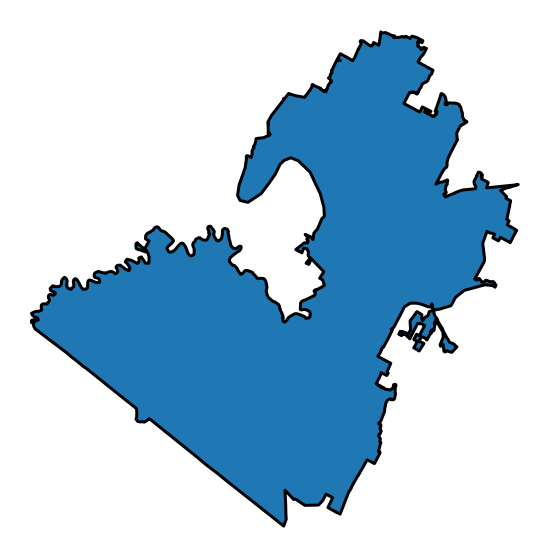

In [70]:
fig, ax = plt.subplots(1, 1, figsize=(10,10))
ax.set_axis_off()
aisd_boundary.plot(ax=ax, edgecolor='black', lw=3)

<AxesSubplot:>

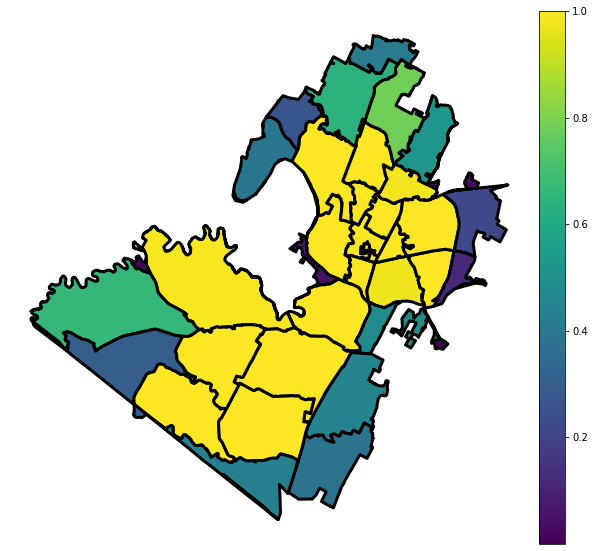

In [71]:
fig, ax = plt.subplots(1, 1, figsize=(10,10))
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)
ax.set_axis_off()
aisd_zcta_2018.plot('pct_zcta_in_aisd', ax=ax, cax=cax, legend=True, edgecolor='black', lw=3)

In [72]:
min(aisd_zcta_2018['pct_zcta_in_aisd'])

0.0001464496899107143

In [73]:
max(aisd_zcta_2018['pct_zcta_in_aisd'])

1.0000000000000027

In [74]:
aisd_zcta_2018_ = aisd_zcta_2018[['GEOID10', 'geometry', 'zcta_area', 'overlap_area', 'pct_zcta_in_aisd']]
aisd_zcta_2019_ = aisd_zcta_2019[['GEOID10', 'geometry', 'zcta_area', 'overlap_area', 'pct_zcta_in_aisd']]
aisd_zcta_2018_['year'] = 2018
aisd_zcta_2019_['year'] = 2019
zcta_trimmed_aisd = gpd.GeoDataFrame(
    pd.concat([aisd_zcta_2018_, aisd_zcta_2019_]),
    crs=aisd_zcta_2018.crs
)

/Users/kpierce/epimodels/epi-venv/lib/python3.9/site-packages/geopandas/geodataframe.py:1351: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


In [75]:
zcta_trimmed_aisd.head()

,GEOID10,geometry,zcta_area,overlap_area,pct_zcta_in_aisd,year
0,78701,"POLYGON ((1715573.992 7352045.518, 1715575.631...",4.481196e+06,4.481196e+06,1.000000,2018
1,78702,"MULTIPOLYGON (((1717314.461 7350949.544, 17173...",1.343599e+07,1.310401e+07,0.975291,2018
2,78703,"POLYGON ((1712741.390 7355519.691, 1712891.362...",1.513242e+07,1.510991e+07,0.998512,2018
3,78704,"POLYGON ((1711200.712 7349309.808, 1711324.678...",2.279053e+07,2.276795e+07,0.999009,2018
4,78705,"POLYGON ((1715596.849 7353802.002, 1715599.304...",5.686645e+06,5.686645e+06,1.000000,2018


In [76]:
zcta_trimmed_aisd.to_file('/Users/kpierce/epimodels/notebooks/AustinGranularModel/DataIntegration/zcta_aisd_intersection_2018_2019.shp')


/var/folders/hn/w8yttt8x7k5141wgqdcfv7fh0000gr/T/ipykernel_7435/362793680.py:1: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  zcta_trimmed_aisd.to_file('/Users/kpierce/epimodels/notebooks/AustinGranularModel/DataIntegration/zcta_aisd_intersection_2018_2019.shp')


In [77]:
zcta_pop_public_school.head()

,GEOID,year,revised_age_group,zcta_pop_by_age,GEOID10,est_private_students_enrolled,population_less_private_school_students
0,75001,2018,00-04,694.000000,NaN,0.0,694.000000
1,75001,2018,05-10,676.706823,NaN,0.0,676.706823
2,75001,2018,11-13,169.816824,NaN,0.0,169.816824
3,75001,2018,14-17,345.476353,NaN,0.0,345.476353
4,75001,2018,18-49,9601.000000,NaN,0.0,9601.000000


In [78]:
print(len(zcta_pop_public_school['GEOID'].unique()))
print(len(zcta_trimmed_aisd['GEOID10'].unique()))

1935
41


In [79]:
zcta_pop_public_school['GEOID'].unique()

array([75001, 75002, 75006, ..., 79936, 79938, 79942])

In [80]:
zcta_trimmed_aisd['GEOID10'].unique()

array(['78701', '78702', '78703', '78704', '78705', '78712', '78719',
       '78721', '78722', '78723', '78724', '78725', '78727', '78730',
       '78731', '78733', '78735', '78736', '78737', '78738', '78739',
       '78741', '78742', '78744', '78745', '78746', '78747', '78748',
       '78749', '78750', '78751', '78752', '78753', '78754', '78756',
       '78757', '78758', '78759', '78620', '78652', '78610'], dtype=object)

In [81]:
zcta_pop_public_school['GEOID'] = zcta_pop_public_school['GEOID'].astype(str)
zcta_pop_public_school_aisd = zcta_pop_public_school[zcta_pop_public_school['GEOID'].isin(zcta_trimmed_aisd['GEOID10'].unique())]


In [82]:
zcta_trimmed_pop = gpd.GeoDataFrame(
    pd.merge(
        zcta_pop_public_school_aisd,
        zcta_trimmed_aisd,
        left_on=['GEOID', 'year'],
        right_on=['GEOID10', 'year'],
        how='left'
    ),
    crs=zcta_trimmed_aisd.crs
)

In [83]:
zcta_trimmed_pop['pop_in_aisd'] = zcta_trimmed_pop['population_less_private_school_students'] * zcta_trimmed_pop['pct_zcta_in_aisd']


In [84]:
zcta_trimmed_pop.head()

,GEOID,year,revised_age_group,zcta_pop_by_age,GEOID10_x,est_private_students_enrolled,population_less_private_school_students,GEOID10_y,geometry,zcta_area,overlap_area,pct_zcta_in_aisd,pop_in_aisd
0,78610,2018,00-04,2766.000000,NaN,0.0,2766.000000,78610,"MULTIPOLYGON (((1713024.946 7334638.578, 17130...",2.402574e+08,404596.141304,0.001684,4.657975
1,78610,2018,05-10,3505.559896,NaN,0.0,3505.559896,78610,"MULTIPOLYGON (((1713024.946 7334638.578, 17130...",2.402574e+08,404596.141304,0.001684,5.903402
2,78610,2018,11-13,1525.951176,NaN,0.0,1525.951176,78610,"MULTIPOLYGON (((1713024.946 7334638.578, 17130...",2.402574e+08,404596.141304,0.001684,2.569719
3,78610,2018,14-17,1665.488927,NaN,0.0,1665.488927,78610,"MULTIPOLYGON (((1713024.946 7334638.578, 17130...",2.402574e+08,404596.141304,0.001684,2.804702
4,78610,2018,18-49,16356.000000,NaN,0.0,16356.000000,78610,"MULTIPOLYGON (((1713024.946 7334638.578, 17130...",2.402574e+08,404596.141304,0.001684,27.543687


In [85]:
zcta_trimmed_pop_ = zcta_trimmed_pop[
    ['GEOID', 'year', 'revised_age_group', 'pop_in_aisd', 'zcta_area', 'overlap_area', 'geometry']
]


In [86]:
zcta_trimmed_pop_.to_file('/Users/kpierce/epimodels/notebooks/AustinGranularModel/DataIntegration/zcta_aisd_intersection_2018_2019_with_populations.shp')


/var/folders/hn/w8yttt8x7k5141wgqdcfv7fh0000gr/T/ipykernel_7435/2550063549.py:1: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  zcta_trimmed_pop_.to_file('/Users/kpierce/epimodels/notebooks/AustinGranularModel/DataIntegration/zcta_aisd_intersection_2018_2019_with_populations.shp')


### 3. Students attending school by home ZCTA (trimmed)

1. Calculate the area of intersection between each ZCTA and all school boundary areas that intersect (typically one elementary school, one middle school, and one high school).
2. Calculate the percentage of each ZCTA that is assigned to each school.
3. Stratify ZCTA popluation data by age.
    - ages 5-9: elementary school
    - ages 10-14: middle school
    - ages 15-17: high school
4. Calculate the students from each ZCTA$_{i}$ attending school$_{j}$ for each school level *k* as 
    
    attendance$_{jk}$ = (areal overlap$_{ij}$ / area ZCTA$_{i}$) * population ZCTA$_{ik}$

In [87]:
zcta_elem_school = zcta_trimmed_pop_[zcta_trimmed_pop_['revised_age_group'] == '05-10']
zcta_midd_school = zcta_trimmed_pop_[zcta_trimmed_pop_['revised_age_group'] == '11-13']
zcta_high_school = zcta_trimmed_pop_[zcta_trimmed_pop_['revised_age_group'] == '14-17']

In [88]:
zcta_elem_school.head()

,GEOID,year,revised_age_group,pop_in_aisd,zcta_area,overlap_area,geometry
1,78610,2018,05-10,5.903402,2.402574e+08,4.045961e+05,"MULTIPOLYGON (((1713024.946 7334638.578, 17130..."
8,78610,2019,05-10,6.211586,2.402757e+08,4.045961e+05,"MULTIPOLYGON (((1713024.946 7334638.578, 17130..."
15,78620,2018,05-10,0.232279,4.475629e+08,6.554544e+04,"MULTIPOLYGON (((1692643.461 7351017.868, 16926..."
22,78620,2019,05-10,0.167338,4.475597e+08,6.549094e+04,"MULTIPOLYGON (((1692643.461 7351017.868, 16926..."
29,78652,2018,05-10,158.377758,4.482030e+07,1.936921e+07,"POLYGON ((1701053.953 7340511.910, 1701250.912..."


In [89]:
zcta_elem_overlay = gpd.overlay(zcta_elem_school, aisd_201819_elem, how='intersection')
zcta_midd_overlay = gpd.overlay(zcta_midd_school, aisd_201819_midd, how='intersection')
zcta_high_overlay = gpd.overlay(zcta_high_school, aisd_201819_high, how='intersection')

zcta_elem_overlay_ = zcta_elem_overlay[
    ['GEOID', 'year', 'revised_age_group', 'zcta_area', 'pop_in_aisd', 'ELEM_DESC', 'geometry']
].rename(columns={'ELEM_DESC': 'school_name'})
zcta_midd_overlay_ = zcta_midd_overlay[
    ['GEOID', 'year', 'revised_age_group', 'zcta_area', 'pop_in_aisd', 'INT_DESC', 'geometry']
].rename(columns={'INT_DESC': 'school_name'})
zcta_high_overlay_ = zcta_high_overlay[
    ['GEOID', 'year', 'revised_age_group', 'zcta_area', 'pop_in_aisd', 'HIGH_DESC', 'geometry']
].rename(columns={'HIGH_DESC': 'school_name'})

In [90]:
zcta_school_overlay = gpd.GeoDataFrame(
    pd.concat([zcta_elem_overlay_, zcta_midd_overlay_, zcta_high_overlay_]),
    crs=zcta_elem_overlay.crs
)

In [91]:
zcta_school_overlay.head()

,GEOID,year,revised_age_group,zcta_area,pop_in_aisd,school_name,geometry
0,78610,2018,05-10,2.402574e+08,5.903402,Baranoff Elementary,"POLYGON ((1706016.214 7336495.649, 1706035.877..."
1,78610,2019,05-10,2.402757e+08,6.211586,Baranoff Elementary,"POLYGON ((1706016.214 7336495.649, 1706035.877..."
2,78652,2018,05-10,4.482030e+07,158.377758,Baranoff Elementary,"POLYGON ((1702435.082 7339513.522, 1702450.935..."
3,78652,2019,05-10,4.482313e+07,113.764453,Baranoff Elementary,"POLYGON ((1702435.082 7339513.522, 1702450.935..."
4,78739,2018,05-10,2.958829e+07,2702.925112,Baranoff Elementary,"POLYGON ((1705408.724 7342524.417, 1705408.825..."


In [92]:
zcta_school_overlay['school_overlap_area'] = zcta_school_overlay.area

In [93]:
zcta_school_overlay['pct_trimmed_zcta_in_school_catchment'] = \
    zcta_school_overlay['school_overlap_area'] / zcta_school_overlay['zcta_area']

In [94]:
zcta_school_overlay.head()

,GEOID,year,revised_age_group,zcta_area,pop_in_aisd,school_name,geometry,school_overlap_area,pct_trimmed_zcta_in_school_catchment
0,78610,2018,05-10,2.402574e+08,5.903402,Baranoff Elementary,"POLYGON ((1706016.214 7336495.649, 1706035.877...",8.237788e+02,0.000003
1,78610,2019,05-10,2.402757e+08,6.211586,Baranoff Elementary,"POLYGON ((1706016.214 7336495.649, 1706035.877...",8.237788e+02,0.000003
2,78652,2018,05-10,4.482030e+07,158.377758,Baranoff Elementary,"POLYGON ((1702435.082 7339513.522, 1702450.935...",3.642175e+06,0.081262
3,78652,2019,05-10,4.482313e+07,113.764453,Baranoff Elementary,"POLYGON ((1702435.082 7339513.522, 1702450.935...",3.644963e+06,0.081319
4,78739,2018,05-10,2.958829e+07,2702.925112,Baranoff Elementary,"POLYGON ((1705408.724 7342524.417, 1705408.825...",1.180583e+07,0.399003


In [95]:
zcta_school_overlay['student_population'] = zcta_school_overlay['pop_in_aisd'] * zcta_school_overlay['pct_trimmed_zcta_in_school_catchment']


In [96]:
zcta_school_overlay.head()

,GEOID,year,revised_age_group,zcta_area,pop_in_aisd,school_name,geometry,school_overlap_area,pct_trimmed_zcta_in_school_catchment,student_population
0,78610,2018,05-10,2.402574e+08,5.903402,Baranoff Elementary,"POLYGON ((1706016.214 7336495.649, 1706035.877...",8.237788e+02,0.000003,0.000020
1,78610,2019,05-10,2.402757e+08,6.211586,Baranoff Elementary,"POLYGON ((1706016.214 7336495.649, 1706035.877...",8.237788e+02,0.000003,0.000021
2,78652,2018,05-10,4.482030e+07,158.377758,Baranoff Elementary,"POLYGON ((1702435.082 7339513.522, 1702450.935...",3.642175e+06,0.081262,12.870049
3,78652,2019,05-10,4.482313e+07,113.764453,Baranoff Elementary,"POLYGON ((1702435.082 7339513.522, 1702450.935...",3.644963e+06,0.081319,9.251188
4,78739,2018,05-10,2.958829e+07,2702.925112,Baranoff Elementary,"POLYGON ((1705408.724 7342524.417, 1705408.825...",1.180583e+07,0.399003,1078.476535


In [97]:
zcta_school_overlay.to_file('/Users/kpierce/epimodels/notebooks/AustinGranularModel/DataIntegration/zcta_aisd_school_level_intersection_2018_2019_with_populations.shp')


/var/folders/hn/w8yttt8x7k5141wgqdcfv7fh0000gr/T/ipykernel_7435/1069478232.py:1: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  zcta_school_overlay.to_file('/Users/kpierce/epimodels/notebooks/AustinGranularModel/DataIntegration/zcta_aisd_school_level_intersection_2018_2019_with_populations.shp')


Finally, combine into "school open" and "school closed" population counts.
- "school open" counts will be used for source, destination logic on school open days for age groups '00-04', '05-10', and '11-13'; counts for other groups will be combined with safegraph data
- "school closed" counts will be combined with safegraph data for source, destination logicl

In [98]:
zcta_trimmed_pop_.head()

,GEOID,year,revised_age_group,pop_in_aisd,zcta_area,overlap_area,geometry
0,78610,2018,00-04,4.657975,2.402574e+08,404596.141304,"MULTIPOLYGON (((1713024.946 7334638.578, 17130..."
1,78610,2018,05-10,5.903402,2.402574e+08,404596.141304,"MULTIPOLYGON (((1713024.946 7334638.578, 17130..."
2,78610,2018,11-13,2.569719,2.402574e+08,404596.141304,"MULTIPOLYGON (((1713024.946 7334638.578, 17130..."
3,78610,2018,14-17,2.804702,2.402574e+08,404596.141304,"MULTIPOLYGON (((1713024.946 7334638.578, 17130..."
4,78610,2018,18-49,27.543687,2.402574e+08,404596.141304,"MULTIPOLYGON (((1713024.946 7334638.578, 17130..."


In [99]:
zcta_trimmed_pop_adults = zcta_trimmed_pop_[
    zcta_trimmed_pop_['revised_age_group'].isin(
        set(['00-04', '18-49', '50-64', '65+'])
    )
]

In [100]:
zcta_trimmed_pop_adults['revised_age_group'].unique()

array(['00-04', '18-49', '50-64', '65+'], dtype=object)

In [101]:
zcta_trimmed_pop_adults = zcta_trimmed_pop_adults[['GEOID', 'year', 'revised_age_group', 'pop_in_aisd']]
zcta_trimmed_pop_adults = zcta_trimmed_pop_adults.rename(columns={'pop_in_aisd': 'population'})
zcta_trimmed_pop_adults['school_name'] = None

In [102]:
zcta_trimmed_pop_adults.head()

,GEOID,year,revised_age_group,population,school_name
0,78610,2018,00-04,4.657975,None
4,78610,2018,18-49,27.543687,None
5,78610,2018,50-64,10.809668,None
6,78610,2018,65+,4.890369,None
7,78610,2019,00-04,4.795698,None


In [103]:
school_open_pop = zcta_school_overlay[['GEOID', 'year', 'revised_age_group', 'school_name', 'student_population']]
school_open_pop = school_open_pop.rename(columns={'student_population': 'population'})

In [104]:
school_open_pop.head()

,GEOID,year,revised_age_group,school_name,population
0,78610,2018,05-10,Baranoff Elementary,0.000020
1,78610,2019,05-10,Baranoff Elementary,0.000021
2,78652,2018,05-10,Baranoff Elementary,12.870049
3,78652,2019,05-10,Baranoff Elementary,9.251188
4,78739,2018,05-10,Baranoff Elementary,1078.476535


In [105]:
school_open_pop_all_ages = pd.concat([school_open_pop, zcta_trimmed_pop_adults])

In [106]:
school_closed_pop_all_ages = zcta_trimmed_pop_[['GEOID', 'year', 'revised_age_group', 'pop_in_aisd']]
school_closed_pop_all_ages = school_closed_pop_all_ages.rename(columns={'pop_in_aisd': 'population'})
school_closed_pop_all_ages['school_name'] = None

In [107]:
school_closed_pop_all_ages.head()

,GEOID,year,revised_age_group,population,school_name
0,78610,2018,00-04,4.657975,None
1,78610,2018,05-10,5.903402,None
2,78610,2018,11-13,2.569719,None
3,78610,2018,14-17,2.804702,None
4,78610,2018,18-49,27.543687,None


Add in the nation wide age group breakdown for dummy ZCTA 99999 (subtract the AISD population)

In [108]:
school_closed_grp_totals = school_closed_pop_all_ages.groupby(['year', 'revised_age_group']).sum('population').reset_index()


In [109]:
school_closed_grp_totals

,year,revised_age_group,population
0,2018,00-04,42315.982601
1,2018,05-10,44797.157335
2,2018,11-13,19669.499756
3,2018,14-17,23910.071019
4,2018,18-49,376765.065608
5,2018,50-64,104246.035273
6,2018,65+,62376.068172
7,2019,00-04,41659.233779
8,2019,05-10,37616.835772
9,2019,11-13,17248.042729


In [110]:
us_pop_long_group_totals_recalc = us_pop_long.groupby(['revised_age_group', 'year'])['population'].sum().reset_index()


In [111]:
us_pop_long_group_totals_recalc

,revised_age_group,year,population
0,00-04,2010,20188815
1,00-04,2011,20123103
2,00-04,2012,19976065
3,00-04,2013,19849215
4,00-04,2014,19872349
...,...,...,...
65,65+,2015,47650770
66,65+,2016,49202071
67,65+,2017,50753404
68,65+,2018,52369339


In [112]:
us_pop_1819_group_totals = us_pop_long_group_totals_recalc[us_pop_long_group_totals_recalc['year'].isin(set([2018, 2019]))]


In [113]:
us_pop_1819_group_totals

,revised_age_group,year,population
8,00-04,2018,19762962
9,00-04,2019,19576683
18,05-10,2018,24369888
19,05-10,2019,24256835
28,11-13,2018,12522418
29,11-13,2019,12572869
38,14-17,2018,16663877
39,14-17,2019,16632763
48,18-49,2018,137915587
49,18-49,2019,138216422


In [114]:
us_aisd_totals = pd.merge(
    school_closed_grp_totals,
    us_pop_1819_group_totals,
    on=['revised_age_group', 'year'],
    suffixes=['_aisd', '_usa'],
    how='left'
)

In [115]:
us_aisd_totals['usa_less_aisd'] = us_aisd_totals['population_usa'] - us_aisd_totals['population_aisd']

In [116]:
us_aisd_totals

,year,revised_age_group,population_aisd,population_usa,usa_less_aisd
0,2018,00-04,42315.982601,19762962,1.972065e+07
1,2018,05-10,44797.157335,24369888,2.432509e+07
2,2018,11-13,19669.499756,12522418,1.250275e+07
3,2018,14-17,23910.071019,16663877,1.663997e+07
4,2018,18-49,376765.065608,137915587,1.375388e+08
5,2018,50-64,104246.035273,63083430,6.297918e+07
6,2018,65+,62376.068172,52369339,5.230696e+07
7,2019,00-04,41659.233779,19576683,1.953502e+07
8,2019,05-10,37616.835772,24256835,2.421922e+07
9,2019,11-13,17248.042729,12572869,1.255562e+07


In [117]:
us_aisd_totals_final = us_aisd_totals[['year', 'revised_age_group', 'usa_less_aisd']]
us_aisd_totals_final = us_aisd_totals_final.rename(columns={'usa_less_aisd': 'population'})

In [118]:
us_aisd_totals_final['GEOID'] = 99999

## THESE ARE THE FINAL POPULATION DATA TO INTEGRATE WITH MOBILITY

In [119]:
school_closed_pop_all_ages = pd.concat([school_closed_pop_all_ages, us_aisd_totals_final])
school_open_pop_all_ages = pd.concat([school_open_pop_all_ages, us_aisd_totals_final])

In [120]:
school_open_pop_all_ages

,GEOID,year,revised_age_group,school_name,population
0,78610,2018,05-10,Baranoff Elementary,2.024120e-05
1,78610,2019,05-10,Baranoff Elementary,2.129625e-05
2,78652,2018,05-10,Baranoff Elementary,1.287005e+01
3,78652,2019,05-10,Baranoff Elementary,9.251188e+00
4,78739,2018,05-10,Baranoff Elementary,1.078477e+03
...,...,...,...,...,...
9,99999,2019,11-13,NaN,1.255562e+07
10,99999,2019,14-17,NaN,1.661109e+07
11,99999,2019,18-49,NaN,1.378327e+08
12,99999,2019,50-64,NaN,6.281978e+07


In [121]:
school_open_pop_all_ages['school_closed'] = False
school_closed_pop_all_ages['school_closed'] = True
school_open_closed_pop_all_ages = pd.concat([school_closed_pop_all_ages, school_open_pop_all_ages])

We can now add in the risk dimension for populating the model initial state (risk doesn't get added to the travel matrix)

In [122]:
zcta_risk = pd.read_csv('/Users/kpierce/epimodels/notebooks/AustinGranularModel/DataIntegration/zcta_age_groups_risk_prop_2018_2019.csv')

In [123]:
zcta_risk.head()

,Unnamed: 0,revised_age_group,ZCTA5,weighted_pct_high_risk,year
0,0,00-04,10001,0.032135,2018
1,1,00-04,10001,0.032135,2019
2,2,00-04,10002,0.036270,2018
3,3,00-04,10002,0.036270,2019
4,4,00-04,10003,0.028565,2018


Calculate national average risk by age group to use for outside AISD risk breakdown

In [124]:
zcta_avg_risk = zcta_risk.groupby(['revised_age_group', 'year']).mean(['weighted_pct_high_risk']).reset_index()

In [125]:
zcta_avg_risk['ZCTA5'] = '99999'

In [126]:
zcta_risk['ZCTA5'] = zcta_risk['ZCTA5'].astype(str)

In [127]:
zcta_avg_risk.head()

,revised_age_group,year,Unnamed: 0,ZCTA5,weighted_pct_high_risk
0,00-04,2018,32408.0,99999,0.063481
1,00-04,2019,32409.0,99999,0.063481
2,05-10,2018,97226.0,99999,0.198322
3,05-10,2019,97227.0,99999,0.198322
4,11-13,2018,162044.0,99999,0.210157


In [128]:
zcta_risk = pd.concat([zcta_risk, zcta_avg_risk])

In [129]:
zcta_risk['ZCTA5'] = zcta_risk['ZCTA5'].astype(str)
school_open_closed_pop_all_ages['GEOID'] = school_open_closed_pop_all_ages['GEOID'].astype(str)

In [130]:
school_open_closed_pop_all_ages['GEOID'].unique()

array(['78610', '78620', '78652', '78701', '78702', '78703', '78704',
       '78705', '78712', '78719', '78721', '78722', '78723', '78724',
       '78725', '78727', '78730', '78731', '78733', '78735', '78736',
       '78737', '78738', '78739', '78741', '78742', '78744', '78745',
       '78746', '78747', '78748', '78749', '78750', '78751', '78752',
       '78753', '78754', '78756', '78757', '78758', '78759', '99999'],
      dtype=object)

In [131]:
zcta_risk['ZCTA5'].unique()

array(['10001', '10002', '10003', ..., '99927', '99929', '99999'],
      dtype=object)

In [132]:
add_risk = pd.merge(
    school_open_closed_pop_all_ages,
    zcta_risk,
    left_on=['GEOID', 'year', 'revised_age_group'],
    right_on=['ZCTA5', 'year', 'revised_age_group'],
    how='left'
)

In [133]:
add_risk['GEOID'].unique()

array(['78610', '78620', '78652', '78701', '78702', '78703', '78704',
       '78705', '78712', '78719', '78721', '78722', '78723', '78724',
       '78725', '78727', '78730', '78731', '78733', '78735', '78736',
       '78737', '78738', '78739', '78741', '78742', '78744', '78745',
       '78746', '78747', '78748', '78749', '78750', '78751', '78752',
       '78753', '78754', '78756', '78757', '78758', '78759', '99999'],
      dtype=object)

In [134]:
add_risk['high'] = add_risk['population'] * add_risk['weighted_pct_high_risk']
add_risk['low'] = add_risk['population'] * (1 - add_risk['weighted_pct_high_risk'])

In [135]:
add_risk['GEOID'] = add_risk['GEOID'].astype(str)

In [136]:
add_risk_long = add_risk.drop(
    columns=['Unnamed: 0', 'ZCTA5', 'weighted_pct_high_risk']
).melt(
    id_vars=['GEOID', 'year', 'revised_age_group', 'school_name', 'school_closed'],
    value_vars=['high', 'low'],
    var_name='risk',
    value_name='risk_population'
)

In [137]:
add_risk_long['GEOID'].unique()

array(['78610', '78620', '78652', '78701', '78702', '78703', '78704',
       '78705', '78712', '78719', '78721', '78722', '78723', '78724',
       '78725', '78727', '78730', '78731', '78733', '78735', '78736',
       '78737', '78738', '78739', '78741', '78742', '78744', '78745',
       '78746', '78747', '78748', '78749', '78750', '78751', '78752',
       '78753', '78754', '78756', '78757', '78758', '78759', '99999'],
      dtype=object)

In [138]:
add_risk_long.tail()

,GEOID,year,revised_age_group,school_name,school_closed,risk,risk_population
3715,99999,2019,11-13,NaN,False,low,9.916964e+06
3716,99999,2019,14-17,NaN,False,low,1.265643e+07
3717,99999,2019,18-49,NaN,False,low,8.777912e+07
3718,99999,2019,50-64,NaN,False,low,2.621735e+07
3719,99999,2019,65+,NaN,False,low,1.406603e+07


In [139]:
add_risk_long['school_name'].unique()

array([None, 'Baranoff Elementary', 'Blazier Elementary',
       'Menchaca Elementary', 'Baldwin Elementary', 'Kiker Elementary',
       'Becker Elementary', 'Bryker Woods Elementary', 'Casis Elementary',
       'Lee Elementary', 'Mathews Elementary', 'Sanchez Elementary',
       'Travis Heights Elementary', 'Zilker Elementary',
       'Allison Elementary', 'Blackshear Elementary', 'Brooke Elementary',
       'Campbell Elementary', 'Govalle Elementary',
       'Maplewood Elementary', 'Metz Elementary',
       'Oak Springs Elementary', 'Ortega Elementary', 'Sims Elementary',
       'Zavala Elementary', 'Barton Hills Elementary',
       'Highland Park Elementary', 'Dawson Elementary',
       'Galindo Elementary', 'Joslin Elementary', 'Linder Elementary',
       'Oak Hill Elementary', 'Rodriguez Elementary',
       'St Elmo Elementary', 'Sunset Valley Elementary',
       'Blanton Elementary', 'Norman Elementary',
       'Pecan Springs Elementary', 'Ridgetop Elementary',
       'Andrews El

The `school_closed_pop_all_ages` can also serve as the census data that populates the model, as it is broken down by ZCTA and age group, and includes the `99999` ZCTA for outside-AISD areas.

In [140]:
census = add_risk_long[add_risk_long['school_closed'] == True][['GEOID', 'year', 'revised_age_group', 'risk', 'risk_population']]
census.to_csv('/Users/kpierce/epimodels/notebooks/AustinGranularModel/DataIntegration/zcta_age_groups_for_initalizing_model_compartments_2018_2019.csv')


### 4. Integrate mobility data

1. Un-pivot the ZCTA visits matrix to a long-form table with source and destination columns.
2. Group mobility data by source and calculate the percentage of each source ZCTA traveling to each destination ZCTA.
3. For weekends/non-school-days, multiply this percentage of travel across ZCTA populations for all age groups.
4. For weekdays/school days, multiply this percentage of travel across ZCTA populations for ages 18 and up only.
5. For weekdays/school days, append the student attendance data calculated in step 3 to account for school age groups.

An intervention process for school closure would modify the partition process that runs every time-step so that travel to that school is zero-ed out and added back to the source ZCTA.

For a regular weekend and weekday, the travel file will look like this for a zip code 78751 with a population of 11 people (1 WFH adult and 10 schoolchildren):

|source|destination|count|day|
|:---|:---|:---|:---|
|78751|78737|1|Sun|
|78751|School|0|Sun|
|78751|78751|10|Sun|
|78751|78737|0|Mon|
|78751|School|10|Mon|
|78751|78751|1|Mon|


In [141]:
example = pd.read_csv('/Users/kpierce/epimodels/notebooks/AustinGranularModel/Mobility/visits_by_day_by_zip_2018-01-01.csv')

In [142]:
example.head()

,date,dest_zip,76527,76530,76537,76574,76578,78602,78610,78612,...,78766,78767,78768,78772,78778,78779,78799,78953,78957,99999
0,2018/01/01,76527,45,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,114
1,2018/01/01,76530,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,17
2,2018/01/01,76537,0,0,423,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,257529
3,2018/01/01,76574,0,48,0,4620,152,0,0,0,...,0,0,0,0,0,0,0,0,0,11826
4,2018/01/01,76578,0,0,0,0,16,0,0,0,...,0,0,0,0,0,0,0,0,0,11


In [143]:
type(school_closed_pop_all_ages['GEOID'].unique()[0])

str

In [144]:
aisd_zips = set(school_closed_pop_all_ages['GEOID'].unique())

In [145]:
from datetime import datetime, timedelta

In [218]:
def prep_mobility(weekly_mobility_matrix, focal_zips):
    
    weekly_mobility_long = pd.melt(
        weekly_mobility_matrix, id_vars=['date', 'dest_zip'], var_name='source_zip', value_name='n'
    )
    weekly_mobility_long['dest_zip'] = weekly_mobility_long['dest_zip'].astype(str)
    weekly_mobility_long['source_zip'] = weekly_mobility_long['source_zip'].astype(str)
    
    # rename zipcodes outside of focal area to 99999
    weekly_mobility_long['dest_zip'] = [i if i in focal_zips else '99999' for i in weekly_mobility_long['dest_zip']]
    weekly_mobility_long['source_zip'] = [i if i in focal_zips else '99999' for i in weekly_mobility_long['source_zip']]
    
    # update total travelers
    weekly_mobility_long_focal = weekly_mobility_long.groupby(['date', 'dest_zip', 'source_zip']).sum('n').reset_index()
    
    # parse date and extract year
    weekly_mobility_long_focal['date'] = [datetime.strptime(i, '%Y/%m/%d') for i in weekly_mobility_long_focal['date']]
    weekly_mobility_long_focal['year'] = [i.year for i in weekly_mobility_long_focal['date']]
    
    return weekly_mobility_long_focal


In [219]:
example_week = prep_mobility(
    weekly_mobility_matrix=example,
    focal_zips=aisd_zips
)

Convert mobility from count to percent of source population traveling on each day to each destination

In [220]:
example_week_source_pop = example_week.groupby(['source_zip', 'date', 'year'])['n'].sum().reset_index()

In [221]:
example_week_source_pop.head()

,source_zip,date,year,n
0,78610,2018-01-01,2018,7305
1,78610,2018-01-02,2018,4791
2,78610,2018-01-03,2018,11436
3,78610,2018-01-04,2018,14067
4,78610,2018-01-05,2018,15594


In [222]:
example_week = pd.merge(
    example_week,
    example_week_source_pop,
    on=['source_zip', 'year', 'date'],
    how='left',
    suffixes=['_travel', '_source']
)

In [223]:
example_week['pct_travel'] = example_week['n_travel'] / example_week['n_source']

In [224]:
example_week.head()

,date,dest_zip,source_zip,n_travel,year,n_source,pct_travel
0,2018-01-01,78610,78610,96,2018,7305,0.013142
1,2018-01-01,78610,78620,0,2018,1750,0.000000
2,2018-01-01,78610,78652,0,2018,3615,0.000000
3,2018-01-01,78610,78701,0,2018,22210,0.000000
4,2018-01-01,78610,78702,0,2018,272,0.000000


In [225]:
import matplotlib.pyplot as plt

(array([11054.,   232.,   138.,    85.,    62.,    31.,    44.,    48.,
           17.,    15.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

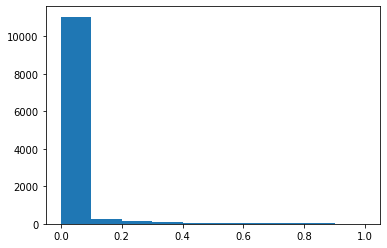

In [226]:
plt.hist(example_week['pct_travel'])

Pseudocode:
- fix the date format for compatibility w/
- for each date
    - multiply n by the percentage of each zcta by age group
    - if date is a school day
        - subtract people from the school age groups... keep max(0, n school) and only send as many kids to school as are actually in the ZCTA. log where the number goes negative and check with Kelly G if there are a lot of negative numbers.
        - append the zcta to school rows
    - if date is not a school day
        - all set
- save the final CSV to disk
- (eventually merge all of the dates from 2018-08-20 (AISD first day of class) through 2019-05-24 (AISD last day of class)

In [227]:
example_wk_pct = example_week[['date', 'year', 'source_zip', 'dest_zip', 'pct_travel']]

In [228]:
example_wk_pct['source_zip'] = example_wk_pct['source_zip'].astype(str)
example_wk_pct['dest_zip'] = example_wk_pct['dest_zip'].astype(str)

example_wk_pct.head()

/var/folders/hn/w8yttt8x7k5141wgqdcfv7fh0000gr/T/ipykernel_7435/315690899.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  example_wk_pct['source_zip'] = example_wk_pct['source_zip'].astype(str)
/var/folders/hn/w8yttt8x7k5141wgqdcfv7fh0000gr/T/ipykernel_7435/315690899.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  example_wk_pct['dest_zip'] = example_wk_pct['dest_zip'].astype(str)


,date,year,source_zip,dest_zip,pct_travel
0,2018-01-01,2018,78610,78610,0.013142
1,2018-01-01,2018,78620,78610,0.000000
2,2018-01-01,2018,78652,78610,0.000000
3,2018-01-01,2018,78701,78610,0.000000
4,2018-01-01,2018,78702,78610,0.000000


In [229]:
example_week_cal = pd.merge(
    example_wk_pct,
    full_calendar[['date', 'school_closed']],
    on=['date'],
    how='left'
)

In [230]:
example_week_cal['source_zip'].unique()

array(['78610', '78620', '78652', '78701', '78702', '78703', '78704',
       '78705', '78712', '78721', '78722', '78723', '78724', '78725',
       '78727', '78730', '78731', '78733', '78735', '78736', '78737',
       '78738', '78739', '78741', '78742', '78744', '78745', '78746',
       '78747', '78748', '78749', '78750', '78751', '78752', '78753',
       '78754', '78756', '78757', '78758', '78759', '99999'], dtype=object)

In [231]:
example_week_pop = pd.merge(
    example_week_cal,
    school_open_closed_pop_all_ages,
    left_on=['source_zip', 'year', 'school_closed'],
    right_on=['GEOID', 'year', 'school_closed'],
    how='inner'
)

In [232]:
example_week_pop.head()

,date,year,source_zip,dest_zip,pct_travel,school_closed,GEOID,revised_age_group,population,school_name
0,2018-01-01,2018,78610,78610,0.013142,True,78610,00-04,4.657975,None
1,2018-01-01,2018,78610,78610,0.013142,True,78610,05-10,5.903402,None
2,2018-01-01,2018,78610,78610,0.013142,True,78610,11-13,2.569719,None
3,2018-01-01,2018,78610,78610,0.013142,True,78610,14-17,2.804702,None
4,2018-01-01,2018,78610,78610,0.013142,True,78610,18-49,27.543687,None


In [233]:
closed = example_week_pop[example_week_pop['school_closed'] == True]

In [234]:
closed['revised_age_group'].value_counts()

00-04    6724
05-10    6724
11-13    6724
14-17    6724
18-49    6724
50-64    6724
65+      6724
Name: revised_age_group, dtype: int64

In [235]:
open_children = example_week_pop[(example_week_pop['school_closed'] == False) & \
                                 (example_week_pop['revised_age_group'].isin(set(['05-10', '11-13', '14-17'])))]
open_adults = example_week_pop[(example_week_pop['school_closed'] == False) & \
                               ~(example_week_pop['revised_age_group'].isin(set(['05-10', '11-13', '14-17'])))]

If school is closed, or for adults only if school is open, multiply the population by the percent of travelers to get the travel estimate.

In [236]:
closed['n_travel'] = closed['pct_travel'] * closed['population']
open_adults['n_travel'] = open_adults['pct_travel'] * open_adults['population']

/var/folders/hn/w8yttt8x7k5141wgqdcfv7fh0000gr/T/ipykernel_7435/2290591608.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  closed['n_travel'] = closed['pct_travel'] * closed['population']
/var/folders/hn/w8yttt8x7k5141wgqdcfv7fh0000gr/T/ipykernel_7435/2290591608.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  open_adults['n_travel'] = open_adults['pct_travel'] * open_adults['population']


If school is open, the child -> school counts derived previously are used (rather than the percent travel based calculation.)

In [237]:
open_no_school = open_children[open_children['school_name'].isnull()]

In [238]:
open_children['source_zip'].unique()

array(['78610', '78620', '78652', '78701', '78702', '78703', '78704',
       '78705', '78712', '78721', '78722', '78723', '78724', '78725',
       '78727', '78730', '78731', '78733', '78735', '78736', '78737',
       '78738', '78739', '78741', '78742', '78744', '78745', '78746',
       '78747', '78748', '78749', '78750', '78751', '78752', '78753',
       '78754', '78756', '78757', '78758', '78759', '99999'], dtype=object)

In [239]:
open_no_school['source_zip'].unique()

array(['99999'], dtype=object)

In [240]:
assert open_no_school['source_zip'].unique().item() == '99999'

open_children = open_children.dropna(subset=['school_name'])

In [241]:
open_children.head()

,date,year,source_zip,dest_zip,pct_travel,school_closed,GEOID,revised_age_group,population,school_name
47068,2018-01-03,2018,78610,78610,0.011542,False,78610,05-10,2.024120e-05,Baranoff Elementary
47069,2018-01-03,2018,78610,78610,0.011542,False,78610,05-10,1.303795e-09,Blazier Elementary
47070,2018-01-03,2018,78610,78610,0.011542,False,78610,05-10,9.921153e-03,Menchaca Elementary
47071,2018-01-03,2018,78610,78610,0.011542,False,78610,11-13,8.810884e-06,Bailey Middle School
47072,2018-01-03,2018,78610,78610,0.011542,False,78610,11-13,4.318624e-03,Paredes Middle School


In [242]:
open_children_travel = open_children.drop(
    ['dest_zip', 'pct_travel', 'GEOID'], axis=1
).rename(
    columns={
        'school_name': 'dest_zip',
        'population': 'n_travel'
    }
)

A sanity check on school attendance:

(array([40344.,  7257.,  3813.,  2583.,  1476.,   615.,   369.,   123.,
            0.,   246.]),
 array([   0.        ,  173.55434297,  347.10868594,  520.66302891,
         694.21737188,  867.77171485, 1041.32605782, 1214.88040079,
        1388.43474376, 1561.98908673, 1735.5434297 ]),
 <BarContainer object of 10 artists>)

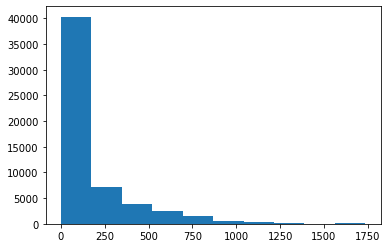

In [243]:
plt.hist(open_children_travel['n_travel'])

In [244]:
open_children['school_name'].unique()

array(['Baranoff Elementary', 'Blazier Elementary', 'Menchaca Elementary',
       'Bailey Middle School', 'Paredes Middle School',
       'Akins High School', 'Bowie High School', 'Baldwin Elementary',
       'Small Middle School', 'Kiker Elementary',
       'Gorzycki Middle School', 'Becker Elementary',
       'Bryker Woods Elementary', 'Casis Elementary', 'Lee Elementary',
       'Mathews Elementary', 'Sanchez Elementary',
       'Travis Heights Elementary', 'Zilker Elementary',
       'Fulmore Middle School', 'Kealing Middle School',
       'Martin Middle School', 'O Henry Middle School',
       'Austin High School', 'McCallum High School', 'Travis High School',
       'Allison Elementary', 'Blackshear Elementary', 'Brooke Elementary',
       'Campbell Elementary', 'Govalle Elementary',
       'Maplewood Elementary', 'Metz Elementary',
       'Oak Springs Elementary', 'Ortega Elementary', 'Sims Elementary',
       'Zavala Elementary', 'Eastside Memorial High School',
       'Reagan 

In [245]:
closed_final = closed.drop(['pct_travel', 'GEOID', 'school_name', 'population'], axis=1)
open_adults = open_adults.drop(['pct_travel', 'GEOID', 'school_name', 'population'], axis=1)
final_travel = pd.concat([open_children_travel, open_adults, closed_final])

In [246]:
final_travel.head()

,date,year,source_zip,school_closed,revised_age_group,n_travel,dest_zip
47068,2018-01-03,2018,78610,False,05-10,2.024120e-05,Baranoff Elementary
47069,2018-01-03,2018,78610,False,05-10,1.303795e-09,Blazier Elementary
47070,2018-01-03,2018,78610,False,05-10,9.921153e-03,Menchaca Elementary
47071,2018-01-03,2018,78610,False,11-13,8.810884e-06,Bailey Middle School
47072,2018-01-03,2018,78610,False,11-13,4.318624e-03,Paredes Middle School


In [264]:
def integrate_mobility(weekly_mobility_df, populations, calendar_df):
    """combine mobility and population based on school vs non-school day"""
    
    # get percent travel for each (source, dest) pair and date
    weekly_mobility_df['source_zip'] = weekly_mobility_df['source_zip'].astype(str)
    weekly_mobility_df_source_pop = weekly_mobility_df.groupby(
        ['source_zip', 'date', 'year']
    )['n'].sum().reset_index()
    
    weekly_mobility_df = pd.merge(
        weekly_mobility_df,
        weekly_mobility_df_source_pop,
        on=['source_zip', 'year', 'date'],
        how='left',
        suffixes=['_travel', '_source']
    )
    weekly_mobility_df['pct_travel'] = weekly_mobility_df['n_travel'] / weekly_mobility_df['n_source']
    weekly_mobility_df = weekly_mobility_df[['date', 'year', 'source_zip', 'dest_zip', 'pct_travel']]

    # look up school open vs closed in calendar
    weekly_mobility_df = pd.merge(
        weekly_mobility_df,
        calendar_df[['date', 'school_closed']],
        on=['date'],
        how='left'
    )
    
    # inner join mobility and populations; will fan out mobility by all the ZCTAs and age groups,
    # but will also filter to the year of interest and the school open/closed status
    populations['GEOID'] = populations['GEOID'].astype(str)
    weekly_mobility_pop = pd.merge(
        weekly_mobility_df,
        populations,
        left_on=['source_zip', 'year', 'school_closed'],
        right_on=['GEOID', 'year', 'school_closed'],
        how='inner'
    )
    
    # parse travel based on school open/closed status
    closed = weekly_mobility_pop[weekly_mobility_pop['school_closed'] == True]
    open_children = weekly_mobility_pop[(weekly_mobility_pop['school_closed'] == False) & \
                                 (weekly_mobility_pop['revised_age_group'].isin(set(['05-10', '11-13', '14-17'])))]
    open_adults = weekly_mobility_pop[(weekly_mobility_pop['school_closed'] == False) & \
                               ~(weekly_mobility_pop['revised_age_group'].isin(set(['05-10', '11-13', '14-17'])))]
    
    # If school is closed, or for adults only if school is open, 
    # multiply the population by the percent of travelers to get the travel estimate.
    closed['n_travel'] = closed['pct_travel'] * closed['population']
    open_adults['n_travel'] = open_adults['pct_travel'] * open_adults['population']
    
    # check that there are no zip codes without school names
    open_no_school = open_children[open_children['school_name'].isnull()]
    if open_no_school.shape[0] > 0:
        try:
            assert open_no_school['source_zip'].unique().item() == '99999'
        except ValueError:
            print(open_no_school['source_zip'].unique())
            raise ValueError
    open_children = open_children.dropna(subset=['school_name'])
    
    # If school is open, the child -> school counts derived previously are used 
    #(rather than the percent travel based calculation)
    open_children_travel = open_children.drop(
        ['dest_zip', 'pct_travel', 'GEOID'], axis=1
    ).rename(
        columns={
            'school_name': 'dest_zip',
            'population': 'n_travel'
        }
    ).drop_duplicates()
    
    # drop extraneous columns and finalize
    closed_final = closed.drop(['pct_travel', 'GEOID', 'school_name', 'population'], axis=1)
    open_adults = open_adults.drop(['pct_travel', 'GEOID', 'school_name', 'population'], axis=1)
    final_travel = pd.concat([open_children_travel, open_adults, closed_final])
    
    return final_travel

In [265]:
example_reload = pd.read_csv('/Users/kpierce/epimodels/notebooks/AustinGranularModel/Mobility/visits_by_day_by_zip_2018-01-01.csv')

example_week_reload = prep_mobility(
    weekly_mobility_matrix=example_reload,
    focal_zips=aisd_zips
)

final_example_travel = integrate_mobility(
    weekly_mobility_df=example_week_reload, 
    populations=school_open_closed_pop_all_ages, 
    calendar_df=full_calendar
)

/var/folders/hn/w8yttt8x7k5141wgqdcfv7fh0000gr/T/ipykernel_7435/1916581323.py:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  closed['n_travel'] = closed['pct_travel'] * closed['population']
/var/folders/hn/w8yttt8x7k5141wgqdcfv7fh0000gr/T/ipykernel_7435/1916581323.py:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  open_adults['n_travel'] = open_adults['pct_travel'] * open_adults['population']


In [266]:
example_week_reload[example_week_reload['dest_zip'] == '99999']

,date,dest_zip,source_zip,n,year
1640,2018-01-01,99999,78610,2928,2018
1641,2018-01-01,99999,78620,10,2018
1642,2018-01-01,99999,78652,753,2018
1643,2018-01-01,99999,78701,9600,2018
1644,2018-01-01,99999,78702,32,2018
...,...,...,...,...,...
11762,2018-01-07,99999,78756,1540,2018
11763,2018-01-07,99999,78757,495,2018
11764,2018-01-07,99999,78758,1188,2018
11765,2018-01-07,99999,78759,7866,2018


In [267]:
final_example_travel.head()

,date,year,source_zip,school_closed,revised_age_group,n_travel,dest_zip
47068,2018-01-03,2018,78610,False,05-10,2.024120e-05,Baranoff Elementary
47069,2018-01-03,2018,78610,False,05-10,1.303795e-09,Blazier Elementary
47070,2018-01-03,2018,78610,False,05-10,9.921153e-03,Menchaca Elementary
47071,2018-01-03,2018,78610,False,11-13,8.810884e-06,Bailey Middle School
47072,2018-01-03,2018,78610,False,11-13,4.318624e-03,Paredes Middle School


In [268]:
tally = final_example_travel.groupby(['date', 'source_zip', 'dest_zip', 'revised_age_group', 'school_closed']).count().reset_index()


In [269]:
max(tally['n_travel'])

1

In [270]:
tally.head()

,date,source_zip,dest_zip,revised_age_group,school_closed,year,n_travel
0,2018-01-01,78610,78610,00-04,True,1,1
1,2018-01-01,78610,78610,05-10,True,1,1
2,2018-01-01,78610,78610,11-13,True,1,1
3,2018-01-01,78610,78610,14-17,True,1,1
4,2018-01-01,78610,78610,18-49,True,1,1


In [271]:
tally[tally['n_travel'] > 1]

,date,source_zip,dest_zip,revised_age_group,school_closed,year,n_travel


In [272]:
final_example_travel[final_example_travel['dest_zip'] == 'Akins High School']

,date,year,source_zip,school_closed,revised_age_group,n_travel,dest_zip
47073,2018-01-03,2018,78610,False,14-17,0.004714,Akins High School
47524,2018-01-04,2018,78610,False,14-17,0.004714,Akins High School
47975,2018-01-05,2018,78610,False,14-17,0.004714,Akins High School
49289,2018-01-03,2018,78652,False,14-17,23.465509,Akins High School
49822,2018-01-04,2018,78652,False,14-17,23.465509,Akins High School
50355,2018-01-05,2018,78652,False,14-17,23.465509,Akins High School
85331,2018-01-03,2018,78739,False,14-17,0.015632,Akins High School
85987,2018-01-04,2018,78739,False,14-17,0.015632,Akins High School
86643,2018-01-05,2018,78739,False,14-17,0.015632,Akins High School
90380,2018-01-03,2018,78744,False,14-17,336.638872,Akins High School


In [273]:
final_example_travel['date'].value_counts()

2018-01-01    11767
2018-01-02    11767
2018-01-06    11767
2018-01-07    11767
2018-01-03     7186
2018-01-04     7186
2018-01-05     7186
Name: date, dtype: int64

In [274]:
final_example_travel.to_csv('/Users/kpierce/epimodels/notebooks/AustinGranularModel/DataIntegration/example_final_travel.csv')


## Do the full data integration...

In [275]:
import os

In [276]:
basedir = '/Users/kpierce/epimodels/notebooks/AustinGranularModel/Mobility/'

In [277]:
visits = [
    os.path.join(basedir, i) for i in os.listdir(
        '/Users/kpierce/epimodels/notebooks/AustinGranularModel/Mobility/'
    ) if ('visits_by_day' in i) and (('2018' in i) or ('2019') in i)
]

In [278]:
visits

['/Users/kpierce/epimodels/notebooks/AustinGranularModel/Mobility/visits_by_day_by_zip_2019-11-18.csv',
 '/Users/kpierce/epimodels/notebooks/AustinGranularModel/Mobility/visits_by_day_by_zip_2019-01-21.csv',
 '/Users/kpierce/epimodels/notebooks/AustinGranularModel/Mobility/visits_by_day_by_zip_2019-08-05.csv',
 '/Users/kpierce/epimodels/notebooks/AustinGranularModel/Mobility/visits_by_day_by_zip_2018-07-23.csv',
 '/Users/kpierce/epimodels/notebooks/AustinGranularModel/Mobility/visits_by_day_by_zip_2019-03-18.csv',
 '/Users/kpierce/epimodels/notebooks/AustinGranularModel/Mobility/visits_by_day_by_zip_2018-12-17.csv',
 '/Users/kpierce/epimodels/notebooks/AustinGranularModel/Mobility/visits_by_day_by_zip_2018-12-03.csv',
 '/Users/kpierce/epimodels/notebooks/AustinGranularModel/Mobility/visits_by_day_by_zip_2019-03-25.csv',
 '/Users/kpierce/epimodels/notebooks/AustinGranularModel/Mobility/visits_by_day_by_zip_2018-02-12.csv',
 '/Users/kpierce/epimodels/notebooks/AustinGranularModel/Mobilit

In [280]:
visits_parsed = []

for i, v in enumerate(visits):
    print(f'Processing file {i} of {len(visits)}')
    visit_matrix = pd.read_csv(v)
    visit_df = prep_mobility(
        weekly_mobility_matrix=visit_matrix,
        focal_zips=aisd_zips
    )
    final_visit_df = integrate_mobility(
        weekly_mobility_df=visit_df, 
        populations=school_open_closed_pop_all_ages, 
        calendar_df=full_calendar
    )
    visits_parsed.append(final_visit_df)


Processing file 0 of 105


/var/folders/hn/w8yttt8x7k5141wgqdcfv7fh0000gr/T/ipykernel_7435/1916581323.py:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  closed['n_travel'] = closed['pct_travel'] * closed['population']
/var/folders/hn/w8yttt8x7k5141wgqdcfv7fh0000gr/T/ipykernel_7435/1916581323.py:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  open_adults['n_travel'] = open_adults['pct_travel'] * open_adults['population']


Processing file 1 of 105


/var/folders/hn/w8yttt8x7k5141wgqdcfv7fh0000gr/T/ipykernel_7435/1916581323.py:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  closed['n_travel'] = closed['pct_travel'] * closed['population']
/var/folders/hn/w8yttt8x7k5141wgqdcfv7fh0000gr/T/ipykernel_7435/1916581323.py:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  open_adults['n_travel'] = open_adults['pct_travel'] * open_adults['population']


Processing file 2 of 105
Processing file 3 of 105
Processing file 4 of 105
Processing file 5 of 105


/var/folders/hn/w8yttt8x7k5141wgqdcfv7fh0000gr/T/ipykernel_7435/1916581323.py:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  closed['n_travel'] = closed['pct_travel'] * closed['population']
/var/folders/hn/w8yttt8x7k5141wgqdcfv7fh0000gr/T/ipykernel_7435/1916581323.py:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  open_adults['n_travel'] = open_adults['pct_travel'] * open_adults['population']


Processing file 6 of 105


/var/folders/hn/w8yttt8x7k5141wgqdcfv7fh0000gr/T/ipykernel_7435/1916581323.py:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  closed['n_travel'] = closed['pct_travel'] * closed['population']
/var/folders/hn/w8yttt8x7k5141wgqdcfv7fh0000gr/T/ipykernel_7435/1916581323.py:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  open_adults['n_travel'] = open_adults['pct_travel'] * open_adults['population']


Processing file 7 of 105


/var/folders/hn/w8yttt8x7k5141wgqdcfv7fh0000gr/T/ipykernel_7435/1916581323.py:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  closed['n_travel'] = closed['pct_travel'] * closed['population']
/var/folders/hn/w8yttt8x7k5141wgqdcfv7fh0000gr/T/ipykernel_7435/1916581323.py:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  open_adults['n_travel'] = open_adults['pct_travel'] * open_adults['population']


Processing file 8 of 105


/var/folders/hn/w8yttt8x7k5141wgqdcfv7fh0000gr/T/ipykernel_7435/1916581323.py:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  closed['n_travel'] = closed['pct_travel'] * closed['population']
/var/folders/hn/w8yttt8x7k5141wgqdcfv7fh0000gr/T/ipykernel_7435/1916581323.py:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  open_adults['n_travel'] = open_adults['pct_travel'] * open_adults['population']


Processing file 9 of 105
Processing file 10 of 105
Processing file 11 of 105
Processing file 12 of 105
Processing file 13 of 105


/var/folders/hn/w8yttt8x7k5141wgqdcfv7fh0000gr/T/ipykernel_7435/1916581323.py:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  closed['n_travel'] = closed['pct_travel'] * closed['population']
/var/folders/hn/w8yttt8x7k5141wgqdcfv7fh0000gr/T/ipykernel_7435/1916581323.py:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  open_adults['n_travel'] = open_adults['pct_travel'] * open_adults['population']


Processing file 14 of 105
Processing file 15 of 105


/var/folders/hn/w8yttt8x7k5141wgqdcfv7fh0000gr/T/ipykernel_7435/1916581323.py:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  closed['n_travel'] = closed['pct_travel'] * closed['population']
/var/folders/hn/w8yttt8x7k5141wgqdcfv7fh0000gr/T/ipykernel_7435/1916581323.py:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  open_adults['n_travel'] = open_adults['pct_travel'] * open_adults['population']


Processing file 16 of 105


/var/folders/hn/w8yttt8x7k5141wgqdcfv7fh0000gr/T/ipykernel_7435/1916581323.py:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  closed['n_travel'] = closed['pct_travel'] * closed['population']
/var/folders/hn/w8yttt8x7k5141wgqdcfv7fh0000gr/T/ipykernel_7435/1916581323.py:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  open_adults['n_travel'] = open_adults['pct_travel'] * open_adults['population']


Processing file 17 of 105


/var/folders/hn/w8yttt8x7k5141wgqdcfv7fh0000gr/T/ipykernel_7435/1916581323.py:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  closed['n_travel'] = closed['pct_travel'] * closed['population']
/var/folders/hn/w8yttt8x7k5141wgqdcfv7fh0000gr/T/ipykernel_7435/1916581323.py:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  open_adults['n_travel'] = open_adults['pct_travel'] * open_adults['population']


Processing file 18 of 105


/var/folders/hn/w8yttt8x7k5141wgqdcfv7fh0000gr/T/ipykernel_7435/1916581323.py:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  closed['n_travel'] = closed['pct_travel'] * closed['population']
/var/folders/hn/w8yttt8x7k5141wgqdcfv7fh0000gr/T/ipykernel_7435/1916581323.py:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  open_adults['n_travel'] = open_adults['pct_travel'] * open_adults['population']


Processing file 19 of 105


/var/folders/hn/w8yttt8x7k5141wgqdcfv7fh0000gr/T/ipykernel_7435/1916581323.py:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  closed['n_travel'] = closed['pct_travel'] * closed['population']
/var/folders/hn/w8yttt8x7k5141wgqdcfv7fh0000gr/T/ipykernel_7435/1916581323.py:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  open_adults['n_travel'] = open_adults['pct_travel'] * open_adults['population']


Processing file 20 of 105


/var/folders/hn/w8yttt8x7k5141wgqdcfv7fh0000gr/T/ipykernel_7435/1916581323.py:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  closed['n_travel'] = closed['pct_travel'] * closed['population']
/var/folders/hn/w8yttt8x7k5141wgqdcfv7fh0000gr/T/ipykernel_7435/1916581323.py:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  open_adults['n_travel'] = open_adults['pct_travel'] * open_adults['population']


Processing file 21 of 105
Processing file 22 of 105


/var/folders/hn/w8yttt8x7k5141wgqdcfv7fh0000gr/T/ipykernel_7435/1916581323.py:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  closed['n_travel'] = closed['pct_travel'] * closed['population']
/var/folders/hn/w8yttt8x7k5141wgqdcfv7fh0000gr/T/ipykernel_7435/1916581323.py:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  open_adults['n_travel'] = open_adults['pct_travel'] * open_adults['population']


Processing file 23 of 105


/var/folders/hn/w8yttt8x7k5141wgqdcfv7fh0000gr/T/ipykernel_7435/1916581323.py:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  closed['n_travel'] = closed['pct_travel'] * closed['population']
/var/folders/hn/w8yttt8x7k5141wgqdcfv7fh0000gr/T/ipykernel_7435/1916581323.py:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  open_adults['n_travel'] = open_adults['pct_travel'] * open_adults['population']


Processing file 24 of 105


/var/folders/hn/w8yttt8x7k5141wgqdcfv7fh0000gr/T/ipykernel_7435/1916581323.py:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  closed['n_travel'] = closed['pct_travel'] * closed['population']
/var/folders/hn/w8yttt8x7k5141wgqdcfv7fh0000gr/T/ipykernel_7435/1916581323.py:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  open_adults['n_travel'] = open_adults['pct_travel'] * open_adults['population']


Processing file 25 of 105
Processing file 26 of 105


/var/folders/hn/w8yttt8x7k5141wgqdcfv7fh0000gr/T/ipykernel_7435/1916581323.py:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  closed['n_travel'] = closed['pct_travel'] * closed['population']
/var/folders/hn/w8yttt8x7k5141wgqdcfv7fh0000gr/T/ipykernel_7435/1916581323.py:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  open_adults['n_travel'] = open_adults['pct_travel'] * open_adults['population']


Processing file 27 of 105


/var/folders/hn/w8yttt8x7k5141wgqdcfv7fh0000gr/T/ipykernel_7435/1916581323.py:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  closed['n_travel'] = closed['pct_travel'] * closed['population']
/var/folders/hn/w8yttt8x7k5141wgqdcfv7fh0000gr/T/ipykernel_7435/1916581323.py:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  open_adults['n_travel'] = open_adults['pct_travel'] * open_adults['population']


Processing file 28 of 105


/var/folders/hn/w8yttt8x7k5141wgqdcfv7fh0000gr/T/ipykernel_7435/1916581323.py:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  closed['n_travel'] = closed['pct_travel'] * closed['population']
/var/folders/hn/w8yttt8x7k5141wgqdcfv7fh0000gr/T/ipykernel_7435/1916581323.py:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  open_adults['n_travel'] = open_adults['pct_travel'] * open_adults['population']


Processing file 29 of 105


/var/folders/hn/w8yttt8x7k5141wgqdcfv7fh0000gr/T/ipykernel_7435/1916581323.py:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  closed['n_travel'] = closed['pct_travel'] * closed['population']
/var/folders/hn/w8yttt8x7k5141wgqdcfv7fh0000gr/T/ipykernel_7435/1916581323.py:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  open_adults['n_travel'] = open_adults['pct_travel'] * open_adults['population']


Processing file 30 of 105
Processing file 31 of 105
Processing file 32 of 105
Processing file 33 of 105


/var/folders/hn/w8yttt8x7k5141wgqdcfv7fh0000gr/T/ipykernel_7435/1916581323.py:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  closed['n_travel'] = closed['pct_travel'] * closed['population']
/var/folders/hn/w8yttt8x7k5141wgqdcfv7fh0000gr/T/ipykernel_7435/1916581323.py:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  open_adults['n_travel'] = open_adults['pct_travel'] * open_adults['population']


Processing file 34 of 105


/var/folders/hn/w8yttt8x7k5141wgqdcfv7fh0000gr/T/ipykernel_7435/1916581323.py:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  closed['n_travel'] = closed['pct_travel'] * closed['population']
/var/folders/hn/w8yttt8x7k5141wgqdcfv7fh0000gr/T/ipykernel_7435/1916581323.py:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  open_adults['n_travel'] = open_adults['pct_travel'] * open_adults['population']


Processing file 35 of 105
Processing file 36 of 105
Processing file 37 of 105


/var/folders/hn/w8yttt8x7k5141wgqdcfv7fh0000gr/T/ipykernel_7435/1916581323.py:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  closed['n_travel'] = closed['pct_travel'] * closed['population']
/var/folders/hn/w8yttt8x7k5141wgqdcfv7fh0000gr/T/ipykernel_7435/1916581323.py:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  open_adults['n_travel'] = open_adults['pct_travel'] * open_adults['population']


Processing file 38 of 105


/var/folders/hn/w8yttt8x7k5141wgqdcfv7fh0000gr/T/ipykernel_7435/1916581323.py:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  closed['n_travel'] = closed['pct_travel'] * closed['population']
/var/folders/hn/w8yttt8x7k5141wgqdcfv7fh0000gr/T/ipykernel_7435/1916581323.py:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  open_adults['n_travel'] = open_adults['pct_travel'] * open_adults['population']


Processing file 39 of 105
Processing file 40 of 105


/var/folders/hn/w8yttt8x7k5141wgqdcfv7fh0000gr/T/ipykernel_7435/1916581323.py:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  closed['n_travel'] = closed['pct_travel'] * closed['population']
/var/folders/hn/w8yttt8x7k5141wgqdcfv7fh0000gr/T/ipykernel_7435/1916581323.py:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  open_adults['n_travel'] = open_adults['pct_travel'] * open_adults['population']


Processing file 41 of 105


/var/folders/hn/w8yttt8x7k5141wgqdcfv7fh0000gr/T/ipykernel_7435/1916581323.py:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  closed['n_travel'] = closed['pct_travel'] * closed['population']
/var/folders/hn/w8yttt8x7k5141wgqdcfv7fh0000gr/T/ipykernel_7435/1916581323.py:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  open_adults['n_travel'] = open_adults['pct_travel'] * open_adults['population']


Processing file 42 of 105


/var/folders/hn/w8yttt8x7k5141wgqdcfv7fh0000gr/T/ipykernel_7435/1916581323.py:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  closed['n_travel'] = closed['pct_travel'] * closed['population']
/var/folders/hn/w8yttt8x7k5141wgqdcfv7fh0000gr/T/ipykernel_7435/1916581323.py:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  open_adults['n_travel'] = open_adults['pct_travel'] * open_adults['population']


Processing file 43 of 105


/var/folders/hn/w8yttt8x7k5141wgqdcfv7fh0000gr/T/ipykernel_7435/1916581323.py:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  closed['n_travel'] = closed['pct_travel'] * closed['population']
/var/folders/hn/w8yttt8x7k5141wgqdcfv7fh0000gr/T/ipykernel_7435/1916581323.py:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  open_adults['n_travel'] = open_adults['pct_travel'] * open_adults['population']


Processing file 44 of 105


/var/folders/hn/w8yttt8x7k5141wgqdcfv7fh0000gr/T/ipykernel_7435/1916581323.py:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  closed['n_travel'] = closed['pct_travel'] * closed['population']
/var/folders/hn/w8yttt8x7k5141wgqdcfv7fh0000gr/T/ipykernel_7435/1916581323.py:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  open_adults['n_travel'] = open_adults['pct_travel'] * open_adults['population']


Processing file 45 of 105


/var/folders/hn/w8yttt8x7k5141wgqdcfv7fh0000gr/T/ipykernel_7435/1916581323.py:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  closed['n_travel'] = closed['pct_travel'] * closed['population']
/var/folders/hn/w8yttt8x7k5141wgqdcfv7fh0000gr/T/ipykernel_7435/1916581323.py:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  open_adults['n_travel'] = open_adults['pct_travel'] * open_adults['population']


Processing file 46 of 105


/var/folders/hn/w8yttt8x7k5141wgqdcfv7fh0000gr/T/ipykernel_7435/1916581323.py:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  closed['n_travel'] = closed['pct_travel'] * closed['population']
/var/folders/hn/w8yttt8x7k5141wgqdcfv7fh0000gr/T/ipykernel_7435/1916581323.py:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  open_adults['n_travel'] = open_adults['pct_travel'] * open_adults['population']


Processing file 47 of 105


/var/folders/hn/w8yttt8x7k5141wgqdcfv7fh0000gr/T/ipykernel_7435/1916581323.py:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  closed['n_travel'] = closed['pct_travel'] * closed['population']
/var/folders/hn/w8yttt8x7k5141wgqdcfv7fh0000gr/T/ipykernel_7435/1916581323.py:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  open_adults['n_travel'] = open_adults['pct_travel'] * open_adults['population']


Processing file 48 of 105


/var/folders/hn/w8yttt8x7k5141wgqdcfv7fh0000gr/T/ipykernel_7435/1916581323.py:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  closed['n_travel'] = closed['pct_travel'] * closed['population']
/var/folders/hn/w8yttt8x7k5141wgqdcfv7fh0000gr/T/ipykernel_7435/1916581323.py:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  open_adults['n_travel'] = open_adults['pct_travel'] * open_adults['population']


Processing file 49 of 105


/var/folders/hn/w8yttt8x7k5141wgqdcfv7fh0000gr/T/ipykernel_7435/1916581323.py:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  closed['n_travel'] = closed['pct_travel'] * closed['population']
/var/folders/hn/w8yttt8x7k5141wgqdcfv7fh0000gr/T/ipykernel_7435/1916581323.py:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  open_adults['n_travel'] = open_adults['pct_travel'] * open_adults['population']


Processing file 50 of 105
Processing file 51 of 105
Processing file 52 of 105


/var/folders/hn/w8yttt8x7k5141wgqdcfv7fh0000gr/T/ipykernel_7435/1916581323.py:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  closed['n_travel'] = closed['pct_travel'] * closed['population']
/var/folders/hn/w8yttt8x7k5141wgqdcfv7fh0000gr/T/ipykernel_7435/1916581323.py:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  open_adults['n_travel'] = open_adults['pct_travel'] * open_adults['population']


Processing file 53 of 105


/var/folders/hn/w8yttt8x7k5141wgqdcfv7fh0000gr/T/ipykernel_7435/1916581323.py:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  closed['n_travel'] = closed['pct_travel'] * closed['population']
/var/folders/hn/w8yttt8x7k5141wgqdcfv7fh0000gr/T/ipykernel_7435/1916581323.py:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  open_adults['n_travel'] = open_adults['pct_travel'] * open_adults['population']


Processing file 54 of 105


/var/folders/hn/w8yttt8x7k5141wgqdcfv7fh0000gr/T/ipykernel_7435/1916581323.py:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  closed['n_travel'] = closed['pct_travel'] * closed['population']
/var/folders/hn/w8yttt8x7k5141wgqdcfv7fh0000gr/T/ipykernel_7435/1916581323.py:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  open_adults['n_travel'] = open_adults['pct_travel'] * open_adults['population']


Processing file 55 of 105
Processing file 56 of 105


/var/folders/hn/w8yttt8x7k5141wgqdcfv7fh0000gr/T/ipykernel_7435/1916581323.py:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  closed['n_travel'] = closed['pct_travel'] * closed['population']
/var/folders/hn/w8yttt8x7k5141wgqdcfv7fh0000gr/T/ipykernel_7435/1916581323.py:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  open_adults['n_travel'] = open_adults['pct_travel'] * open_adults['population']


Processing file 57 of 105


/var/folders/hn/w8yttt8x7k5141wgqdcfv7fh0000gr/T/ipykernel_7435/1916581323.py:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  closed['n_travel'] = closed['pct_travel'] * closed['population']
/var/folders/hn/w8yttt8x7k5141wgqdcfv7fh0000gr/T/ipykernel_7435/1916581323.py:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  open_adults['n_travel'] = open_adults['pct_travel'] * open_adults['population']


Processing file 58 of 105


/var/folders/hn/w8yttt8x7k5141wgqdcfv7fh0000gr/T/ipykernel_7435/1916581323.py:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  closed['n_travel'] = closed['pct_travel'] * closed['population']
/var/folders/hn/w8yttt8x7k5141wgqdcfv7fh0000gr/T/ipykernel_7435/1916581323.py:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  open_adults['n_travel'] = open_adults['pct_travel'] * open_adults['population']


Processing file 59 of 105


/var/folders/hn/w8yttt8x7k5141wgqdcfv7fh0000gr/T/ipykernel_7435/1916581323.py:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  closed['n_travel'] = closed['pct_travel'] * closed['population']
/var/folders/hn/w8yttt8x7k5141wgqdcfv7fh0000gr/T/ipykernel_7435/1916581323.py:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  open_adults['n_travel'] = open_adults['pct_travel'] * open_adults['population']


Processing file 60 of 105


/var/folders/hn/w8yttt8x7k5141wgqdcfv7fh0000gr/T/ipykernel_7435/1916581323.py:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  closed['n_travel'] = closed['pct_travel'] * closed['population']
/var/folders/hn/w8yttt8x7k5141wgqdcfv7fh0000gr/T/ipykernel_7435/1916581323.py:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  open_adults['n_travel'] = open_adults['pct_travel'] * open_adults['population']


Processing file 61 of 105


/var/folders/hn/w8yttt8x7k5141wgqdcfv7fh0000gr/T/ipykernel_7435/1916581323.py:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  closed['n_travel'] = closed['pct_travel'] * closed['population']
/var/folders/hn/w8yttt8x7k5141wgqdcfv7fh0000gr/T/ipykernel_7435/1916581323.py:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  open_adults['n_travel'] = open_adults['pct_travel'] * open_adults['population']


Processing file 62 of 105
Processing file 63 of 105


/var/folders/hn/w8yttt8x7k5141wgqdcfv7fh0000gr/T/ipykernel_7435/1916581323.py:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  closed['n_travel'] = closed['pct_travel'] * closed['population']
/var/folders/hn/w8yttt8x7k5141wgqdcfv7fh0000gr/T/ipykernel_7435/1916581323.py:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  open_adults['n_travel'] = open_adults['pct_travel'] * open_adults['population']


Processing file 64 of 105
Processing file 65 of 105
Processing file 66 of 105
Processing file 67 of 105


/var/folders/hn/w8yttt8x7k5141wgqdcfv7fh0000gr/T/ipykernel_7435/1916581323.py:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  closed['n_travel'] = closed['pct_travel'] * closed['population']
/var/folders/hn/w8yttt8x7k5141wgqdcfv7fh0000gr/T/ipykernel_7435/1916581323.py:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  open_adults['n_travel'] = open_adults['pct_travel'] * open_adults['population']


Processing file 68 of 105


/var/folders/hn/w8yttt8x7k5141wgqdcfv7fh0000gr/T/ipykernel_7435/1916581323.py:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  closed['n_travel'] = closed['pct_travel'] * closed['population']
/var/folders/hn/w8yttt8x7k5141wgqdcfv7fh0000gr/T/ipykernel_7435/1916581323.py:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  open_adults['n_travel'] = open_adults['pct_travel'] * open_adults['population']


Processing file 69 of 105


/var/folders/hn/w8yttt8x7k5141wgqdcfv7fh0000gr/T/ipykernel_7435/1916581323.py:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  closed['n_travel'] = closed['pct_travel'] * closed['population']
/var/folders/hn/w8yttt8x7k5141wgqdcfv7fh0000gr/T/ipykernel_7435/1916581323.py:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  open_adults['n_travel'] = open_adults['pct_travel'] * open_adults['population']


Processing file 70 of 105


/var/folders/hn/w8yttt8x7k5141wgqdcfv7fh0000gr/T/ipykernel_7435/1916581323.py:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  closed['n_travel'] = closed['pct_travel'] * closed['population']
/var/folders/hn/w8yttt8x7k5141wgqdcfv7fh0000gr/T/ipykernel_7435/1916581323.py:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  open_adults['n_travel'] = open_adults['pct_travel'] * open_adults['population']


Processing file 71 of 105
Processing file 72 of 105


/var/folders/hn/w8yttt8x7k5141wgqdcfv7fh0000gr/T/ipykernel_7435/1916581323.py:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  closed['n_travel'] = closed['pct_travel'] * closed['population']
/var/folders/hn/w8yttt8x7k5141wgqdcfv7fh0000gr/T/ipykernel_7435/1916581323.py:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  open_adults['n_travel'] = open_adults['pct_travel'] * open_adults['population']


Processing file 73 of 105


/var/folders/hn/w8yttt8x7k5141wgqdcfv7fh0000gr/T/ipykernel_7435/1916581323.py:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  closed['n_travel'] = closed['pct_travel'] * closed['population']
/var/folders/hn/w8yttt8x7k5141wgqdcfv7fh0000gr/T/ipykernel_7435/1916581323.py:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  open_adults['n_travel'] = open_adults['pct_travel'] * open_adults['population']


Processing file 74 of 105


/var/folders/hn/w8yttt8x7k5141wgqdcfv7fh0000gr/T/ipykernel_7435/1916581323.py:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  closed['n_travel'] = closed['pct_travel'] * closed['population']
/var/folders/hn/w8yttt8x7k5141wgqdcfv7fh0000gr/T/ipykernel_7435/1916581323.py:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  open_adults['n_travel'] = open_adults['pct_travel'] * open_adults['population']


Processing file 75 of 105


/var/folders/hn/w8yttt8x7k5141wgqdcfv7fh0000gr/T/ipykernel_7435/1916581323.py:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  closed['n_travel'] = closed['pct_travel'] * closed['population']
/var/folders/hn/w8yttt8x7k5141wgqdcfv7fh0000gr/T/ipykernel_7435/1916581323.py:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  open_adults['n_travel'] = open_adults['pct_travel'] * open_adults['population']


Processing file 76 of 105
Processing file 77 of 105
Processing file 78 of 105


/var/folders/hn/w8yttt8x7k5141wgqdcfv7fh0000gr/T/ipykernel_7435/1916581323.py:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  closed['n_travel'] = closed['pct_travel'] * closed['population']
/var/folders/hn/w8yttt8x7k5141wgqdcfv7fh0000gr/T/ipykernel_7435/1916581323.py:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  open_adults['n_travel'] = open_adults['pct_travel'] * open_adults['population']


Processing file 79 of 105


/var/folders/hn/w8yttt8x7k5141wgqdcfv7fh0000gr/T/ipykernel_7435/1916581323.py:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  closed['n_travel'] = closed['pct_travel'] * closed['population']
/var/folders/hn/w8yttt8x7k5141wgqdcfv7fh0000gr/T/ipykernel_7435/1916581323.py:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  open_adults['n_travel'] = open_adults['pct_travel'] * open_adults['population']


Processing file 80 of 105


/var/folders/hn/w8yttt8x7k5141wgqdcfv7fh0000gr/T/ipykernel_7435/1916581323.py:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  closed['n_travel'] = closed['pct_travel'] * closed['population']
/var/folders/hn/w8yttt8x7k5141wgqdcfv7fh0000gr/T/ipykernel_7435/1916581323.py:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  open_adults['n_travel'] = open_adults['pct_travel'] * open_adults['population']


Processing file 81 of 105
Processing file 82 of 105
Processing file 83 of 105


/var/folders/hn/w8yttt8x7k5141wgqdcfv7fh0000gr/T/ipykernel_7435/1916581323.py:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  closed['n_travel'] = closed['pct_travel'] * closed['population']
/var/folders/hn/w8yttt8x7k5141wgqdcfv7fh0000gr/T/ipykernel_7435/1916581323.py:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  open_adults['n_travel'] = open_adults['pct_travel'] * open_adults['population']


Processing file 84 of 105


/var/folders/hn/w8yttt8x7k5141wgqdcfv7fh0000gr/T/ipykernel_7435/1916581323.py:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  closed['n_travel'] = closed['pct_travel'] * closed['population']
/var/folders/hn/w8yttt8x7k5141wgqdcfv7fh0000gr/T/ipykernel_7435/1916581323.py:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  open_adults['n_travel'] = open_adults['pct_travel'] * open_adults['population']


Processing file 85 of 105


/var/folders/hn/w8yttt8x7k5141wgqdcfv7fh0000gr/T/ipykernel_7435/1916581323.py:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  closed['n_travel'] = closed['pct_travel'] * closed['population']
/var/folders/hn/w8yttt8x7k5141wgqdcfv7fh0000gr/T/ipykernel_7435/1916581323.py:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  open_adults['n_travel'] = open_adults['pct_travel'] * open_adults['population']


Processing file 86 of 105


/var/folders/hn/w8yttt8x7k5141wgqdcfv7fh0000gr/T/ipykernel_7435/1916581323.py:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  closed['n_travel'] = closed['pct_travel'] * closed['population']
/var/folders/hn/w8yttt8x7k5141wgqdcfv7fh0000gr/T/ipykernel_7435/1916581323.py:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  open_adults['n_travel'] = open_adults['pct_travel'] * open_adults['population']


Processing file 87 of 105


/var/folders/hn/w8yttt8x7k5141wgqdcfv7fh0000gr/T/ipykernel_7435/1916581323.py:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  closed['n_travel'] = closed['pct_travel'] * closed['population']
/var/folders/hn/w8yttt8x7k5141wgqdcfv7fh0000gr/T/ipykernel_7435/1916581323.py:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  open_adults['n_travel'] = open_adults['pct_travel'] * open_adults['population']


Processing file 88 of 105


/var/folders/hn/w8yttt8x7k5141wgqdcfv7fh0000gr/T/ipykernel_7435/1916581323.py:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  closed['n_travel'] = closed['pct_travel'] * closed['population']
/var/folders/hn/w8yttt8x7k5141wgqdcfv7fh0000gr/T/ipykernel_7435/1916581323.py:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  open_adults['n_travel'] = open_adults['pct_travel'] * open_adults['population']


Processing file 89 of 105


/var/folders/hn/w8yttt8x7k5141wgqdcfv7fh0000gr/T/ipykernel_7435/1916581323.py:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  closed['n_travel'] = closed['pct_travel'] * closed['population']
/var/folders/hn/w8yttt8x7k5141wgqdcfv7fh0000gr/T/ipykernel_7435/1916581323.py:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  open_adults['n_travel'] = open_adults['pct_travel'] * open_adults['population']


Processing file 90 of 105


/var/folders/hn/w8yttt8x7k5141wgqdcfv7fh0000gr/T/ipykernel_7435/1916581323.py:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  closed['n_travel'] = closed['pct_travel'] * closed['population']
/var/folders/hn/w8yttt8x7k5141wgqdcfv7fh0000gr/T/ipykernel_7435/1916581323.py:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  open_adults['n_travel'] = open_adults['pct_travel'] * open_adults['population']


Processing file 91 of 105


/var/folders/hn/w8yttt8x7k5141wgqdcfv7fh0000gr/T/ipykernel_7435/1916581323.py:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  closed['n_travel'] = closed['pct_travel'] * closed['population']
/var/folders/hn/w8yttt8x7k5141wgqdcfv7fh0000gr/T/ipykernel_7435/1916581323.py:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  open_adults['n_travel'] = open_adults['pct_travel'] * open_adults['population']


Processing file 92 of 105


/var/folders/hn/w8yttt8x7k5141wgqdcfv7fh0000gr/T/ipykernel_7435/1916581323.py:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  closed['n_travel'] = closed['pct_travel'] * closed['population']
/var/folders/hn/w8yttt8x7k5141wgqdcfv7fh0000gr/T/ipykernel_7435/1916581323.py:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  open_adults['n_travel'] = open_adults['pct_travel'] * open_adults['population']


Processing file 93 of 105


/var/folders/hn/w8yttt8x7k5141wgqdcfv7fh0000gr/T/ipykernel_7435/1916581323.py:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  closed['n_travel'] = closed['pct_travel'] * closed['population']
/var/folders/hn/w8yttt8x7k5141wgqdcfv7fh0000gr/T/ipykernel_7435/1916581323.py:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  open_adults['n_travel'] = open_adults['pct_travel'] * open_adults['population']


Processing file 94 of 105


/var/folders/hn/w8yttt8x7k5141wgqdcfv7fh0000gr/T/ipykernel_7435/1916581323.py:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  closed['n_travel'] = closed['pct_travel'] * closed['population']
/var/folders/hn/w8yttt8x7k5141wgqdcfv7fh0000gr/T/ipykernel_7435/1916581323.py:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  open_adults['n_travel'] = open_adults['pct_travel'] * open_adults['population']


Processing file 95 of 105
Processing file 96 of 105
Processing file 97 of 105


/var/folders/hn/w8yttt8x7k5141wgqdcfv7fh0000gr/T/ipykernel_7435/1916581323.py:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  closed['n_travel'] = closed['pct_travel'] * closed['population']
/var/folders/hn/w8yttt8x7k5141wgqdcfv7fh0000gr/T/ipykernel_7435/1916581323.py:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  open_adults['n_travel'] = open_adults['pct_travel'] * open_adults['population']


Processing file 98 of 105


/var/folders/hn/w8yttt8x7k5141wgqdcfv7fh0000gr/T/ipykernel_7435/1916581323.py:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  closed['n_travel'] = closed['pct_travel'] * closed['population']
/var/folders/hn/w8yttt8x7k5141wgqdcfv7fh0000gr/T/ipykernel_7435/1916581323.py:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  open_adults['n_travel'] = open_adults['pct_travel'] * open_adults['population']


Processing file 99 of 105


/var/folders/hn/w8yttt8x7k5141wgqdcfv7fh0000gr/T/ipykernel_7435/1916581323.py:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  closed['n_travel'] = closed['pct_travel'] * closed['population']
/var/folders/hn/w8yttt8x7k5141wgqdcfv7fh0000gr/T/ipykernel_7435/1916581323.py:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  open_adults['n_travel'] = open_adults['pct_travel'] * open_adults['population']


Processing file 100 of 105
Processing file 101 of 105


/var/folders/hn/w8yttt8x7k5141wgqdcfv7fh0000gr/T/ipykernel_7435/1916581323.py:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  closed['n_travel'] = closed['pct_travel'] * closed['population']
/var/folders/hn/w8yttt8x7k5141wgqdcfv7fh0000gr/T/ipykernel_7435/1916581323.py:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  open_adults['n_travel'] = open_adults['pct_travel'] * open_adults['population']


Processing file 102 of 105


/var/folders/hn/w8yttt8x7k5141wgqdcfv7fh0000gr/T/ipykernel_7435/1916581323.py:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  closed['n_travel'] = closed['pct_travel'] * closed['population']
/var/folders/hn/w8yttt8x7k5141wgqdcfv7fh0000gr/T/ipykernel_7435/1916581323.py:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  open_adults['n_travel'] = open_adults['pct_travel'] * open_adults['population']


Processing file 103 of 105


/var/folders/hn/w8yttt8x7k5141wgqdcfv7fh0000gr/T/ipykernel_7435/1916581323.py:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  closed['n_travel'] = closed['pct_travel'] * closed['population']
/var/folders/hn/w8yttt8x7k5141wgqdcfv7fh0000gr/T/ipykernel_7435/1916581323.py:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  open_adults['n_travel'] = open_adults['pct_travel'] * open_adults['population']


Processing file 104 of 105


/var/folders/hn/w8yttt8x7k5141wgqdcfv7fh0000gr/T/ipykernel_7435/1916581323.py:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  closed['n_travel'] = closed['pct_travel'] * closed['population']
/var/folders/hn/w8yttt8x7k5141wgqdcfv7fh0000gr/T/ipykernel_7435/1916581323.py:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  open_adults['n_travel'] = open_adults['pct_travel'] * open_adults['population']


In [281]:
visits_parsed_df = pd.concat(visits_parsed)

In [284]:
visits_parsed_df = visits_parsed_df.sort_values(['date', 'source_zip', 'dest_zip', 'revised_age_group'])

In [285]:
visits_parsed_df.head()

,date,year,source_zip,school_closed,revised_age_group,n_travel,dest_zip
0,2018-01-01,2018,78610,True,00-04,0.061214,78610
1,2018-01-01,2018,78610,True,05-10,0.077581,78610
2,2018-01-01,2018,78610,True,11-13,0.033770,78610
3,2018-01-01,2018,78610,True,14-17,0.036859,78610
4,2018-01-01,2018,78610,True,18-49,0.361970,78610


In [286]:
visits_parsed_df.to_csv('/Users/kpierce/epimodels/notebooks/AustinGranularModel/DataIntegration/final_aisd_2018_2019_travel.csv')


In [287]:
visits_parsed_df.shape

(6977398, 7)